<a href="https://colab.research.google.com/github/PatricioSaavedraV/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contexto

El 15 de abril de 1912, el RMS Titanic colisionó con un iceberg. Desafortunamente, no tenían suficientes botes salvavidas, lo cual resultó en 1502 muertos de un total de 2224 pasajeros.

Al parecer, quienes sobrevivieron no fue solo por suerte y se cree que hay diferentes variables que influyeron en la salvación de ciertos grupos de personas 💰

Se contará con 3 archivos .csv que cuentan con la siguiente información:
*   train.csv: Contiene el detalle de un subconjunto de pasajeros (891) y lo más importante, si sobrevivieron o no.
*   test.csv: Contiene información similar de 418 pasarejos, pero no indica si sobrevivieron o no.
*   gender_submission: Corresponde a un conjunto de datos el cual asume que todas las mujeres sobrevivieron y todos los hombres fallecieron.

### Objetivo

**Utilizar Machine Learning para crear un modelo que pueda predecir cuales pasajeros del test.csv sobrevieron al naufragio del Titanic.**

### Dicccionario de datos

*   PassengerId: Id del pasajero.
*   Survived: Survived: 0 = No, 1 = Yes.
*   Pclass: Ticket class:	1 = 1ra clase, 2 = 2da clase, 3 = 3ra clase.
*   Sex: Sexo.
*   Age: Edad en años.
*   Sibsp: Siblings/Spouses: Número de hermanos/as o esposos/as a bordo del Titanic.
*   Parch: Parent/Child: Número de padres o niños/as a bordo del Titanic.
*   Ticket: Número del ticket.
*   Fare: Tarifa pagada por el pasajero.
*   Cabin: Número de cabina.
*   Embarked: Puerto de embarcación: C = Cherbourg, Q = Queenstown, S = Southampton.

Observaciones:
*   La edad es fraccionada si es menor que 1. Si la edad se estima, está en la forma xx.5.
*   Sibling = hermano, hermana, hermanastro, hermanastra.
*   Spouse = marido, esposa (las amantes y los prometidos fueron ignorados).
*   Parent = madre y padre.
*   Child = hija, hijo, hijastra, hijastro.
*   Algunos niños viajaron sólo con una niñera, por lo tanto, parch=0 para ellos.

## Lectura de datos

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
# Importar datos
data_raw = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQoP0fj0IM32zsvXZz-qzQfCk1f8qpSVGhs3SuJkq50EL0iVCT2_R6D5WxoqpnWmi-PcNlETAj8dK2S/pub?output=csv')
data_test  = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ1UrNSppjTMNRQCsqXtfNfWuIunUl0woBPBuOwlJnna7wN8r5nHcDbHmeBcq6P6jlUGmOTr4eZUwhm/pub?output=csv')
data_gender_submission = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRbl_FdeObBBE5a3d6ed0yRcK9sqmsSjAu8SOsZz3mFCRUFWW_G2ZtQZLCXD0TkZgPb8ZZHSLXXcces/pub?output=csv')

In [3]:
# Lectura datos
raw_and_columns = 'Cantidad de filas y columnas'

print(f"{raw_and_columns} {data_raw.shape}")
data_raw.head()

Cantidad de filas y columnas (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"{raw_and_columns} {data_test.shape}")
data_test.head()

Cantidad de filas y columnas (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"{raw_and_columns} {data_gender_submission.shape}")
data_gender_submission.head()

Cantidad de filas y columnas (418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Análisis exploratorio

### Análisis general de los datos

In [6]:
# Tipo de dato por cada atributo
data_raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

El atributo a predecir "Survived" tiene 2 opciones, por lo cual, corresponde a un **problema de clasificación binaria.**

La variable de "Sex" se podría modificar a valores de 0 y 1. Lo mismo sucede con la variable "Embarked" que se podría modificar a valores de 1, 2 y 3.

La característica "Name" se podría dividir y extraer el "título" del pasajero para identificar si tiene algún valor.

In [7]:
# Descripción general de los datos
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
data_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


"PassengerId", es solo un número identificador al azar, por lo cual se debería eliminar, ya que no entrega valor.

Lo mismo sucede con "Ticket", el cual corresponde a un número al azar que se debería eliminar.

Por otra parte, se puede apreciar que la desviación estándar del atributo "Fare" (tarifa) es muy alta en relación al resto. Además, tiene un dato mínimo de 0 y un máximo de 512.329. Por tanto, podrían haber datos faltantes.

Lo mismo sucede para el atributo "SibSp" y "Parch" donde el mínimo es 0, pero es entendible, ya que podrían haber pasajeros viajando solos o podrían ser niños viajando con niñera. Acá se podría crear una variable llamada "Familiy size" que junte SibSp y Parch.

In [8]:
# Cálcular porcentaje de valores nulos por característica para data_raw
def perc_null_values(df):
  perc_null = (df.isnull().sum()/len(df))*100
  return perc_null.round(2)

perc_null = perc_null_values(data_raw)
perc_null

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Acá podemos observar que "Cabin" tiene un 77% de sus datos NULL, por lo cual debería ser eliminada.

En el caso de "Age" hay un 19% de datos NULL, por lo cual, se podría realizar algún tratamiento. Si bien su desviación estándar es un poco alta, su promedio está muy cercano a la madiana, por lo cual podríamos reemplazar los valores NULL con su media.

In [9]:
# Cálcular porcentaje de valores nulos por característica para data_test
perc_null = perc_null_values(data_test)
perc_null

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

En el test podemos ver que hay un 20% de datos NULL en la variable "Age", por lo cual, se podría aplicar el mismo tratamiento que se haga al data_raw.

Lo mismo sucede para Cabin, donde hay un 78% de datos NULL y al igual que el data_raw, se deberían eliminar.

In [10]:
# Observación de cada opción en la variable "survived" que se debe predecir
data_raw.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

La opción 1, que correspondiente a pasajeros sobrevivientes, tiene un 62% de datos en comparación a la opción 0.

Por tanto, existe un desbalance y veremos más adelante si influye en la predicción.

In [11]:
# Sesgo
data_raw.skew()

<ipython-input-11-ed7d7137631d>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_raw.skew()


PassengerId    0.000
Survived       0.479
Pclass        -0.631
Age            0.389
SibSp          3.695
Parch          2.749
Fare           4.787
dtype: float64

La variable con mayor sesgo es "Fare". Como se  observará más adelante, esto se debe a un valor atípico de GBP 512,329.

### Análisis por variable

<Axes: xlabel='Fare', ylabel='Density'>

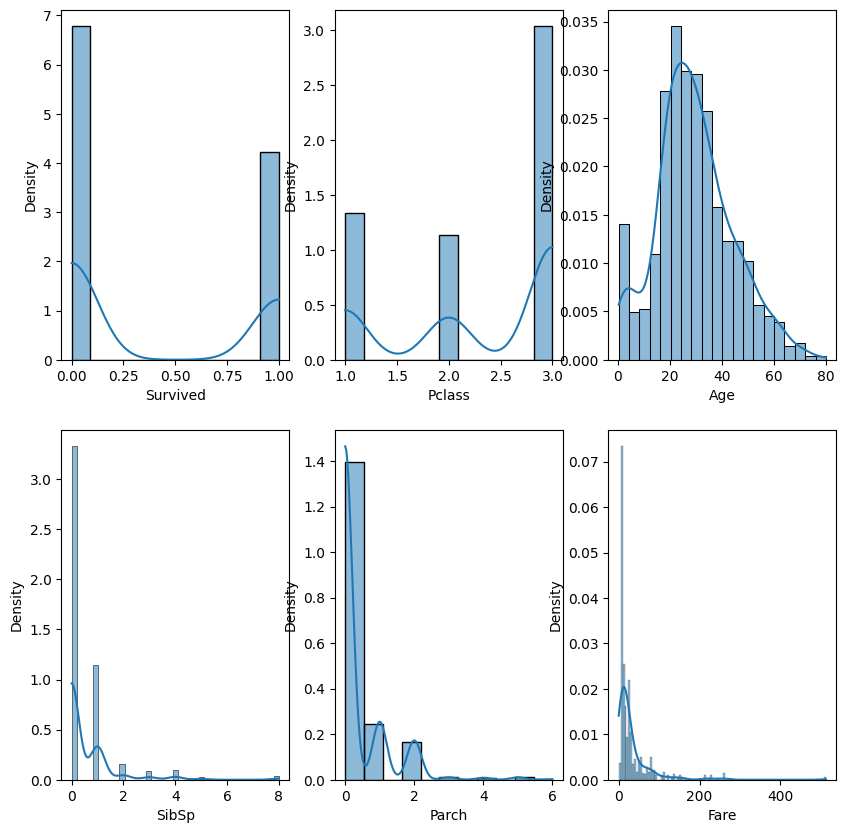

In [12]:
# Histograma por variable
f, ax = plt.subplots(2,3,figsize=(10,10))
sns.histplot(data_raw["Survived"], ax = ax[0,0], kde=True, stat="density")
sns.histplot(data_raw["Pclass"], ax = ax[0,1], kde=True, stat="density")
sns.histplot(data_raw["Age"], ax = ax[0,2], kde=True, stat="density")
sns.histplot(data_raw["SibSp"], ax = ax[1,0], kde=True, stat="density")
sns.histplot(data_raw["Parch"], ax = ax[1,1], kde=True, stat="density")
sns.histplot(data_raw["Fare"], ax = ax[1,2], kde=True, stat="density")

<Axes: ylabel='Fare'>

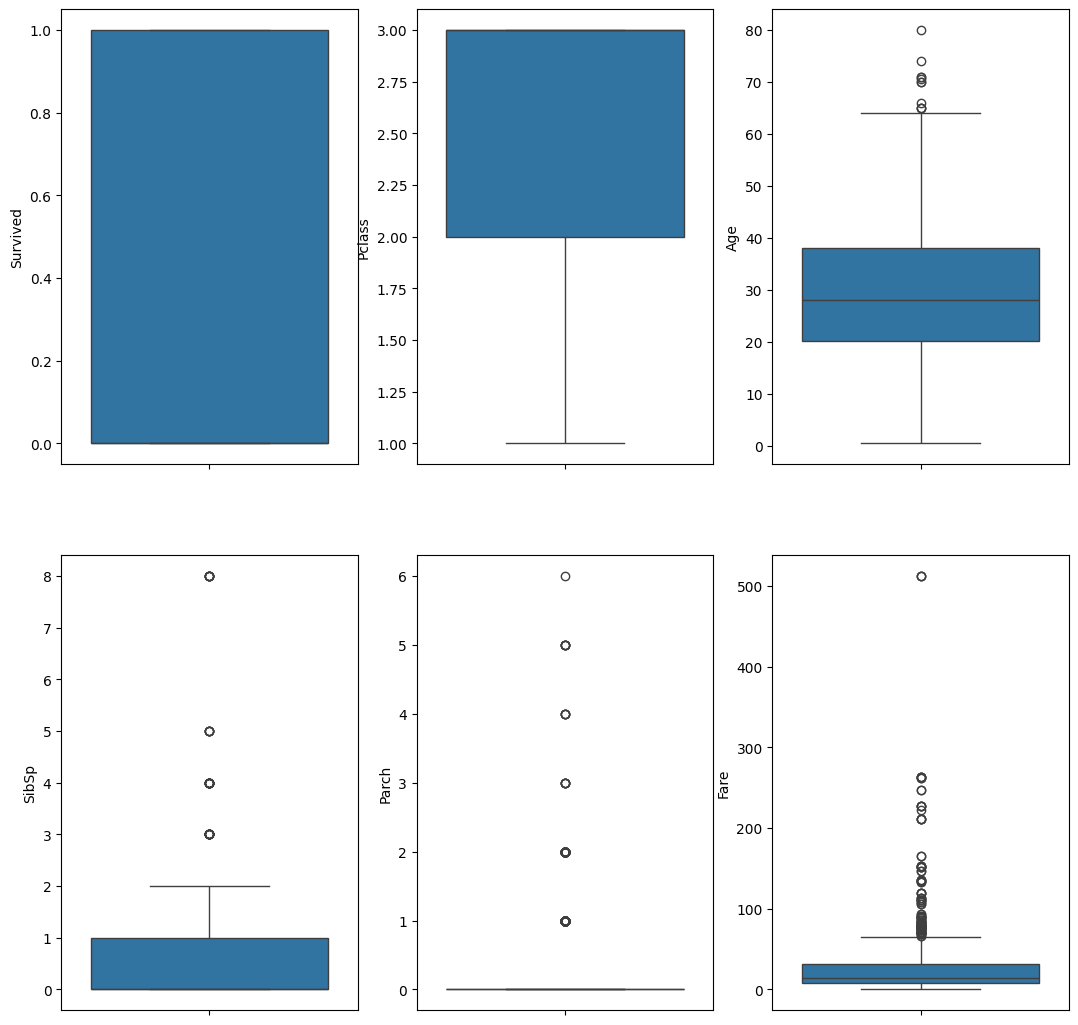

In [13]:
# Boxplots por variable
f, ax = plt.subplots(2,3,figsize=(13,13))
sns.boxplot(data_raw["Survived"], ax = ax[0,0])
sns.boxplot(data_raw["Pclass"], ax = ax[0,1])
sns.boxplot(data_raw["Age"], ax = ax[0,2])
sns.boxplot(data_raw["SibSp"], ax = ax[1,0])
sns.boxplot(data_raw["Parch"], ax = ax[1,1])
sns.boxplot(data_raw["Fare"], ax = ax[1,2])

#### Pclass

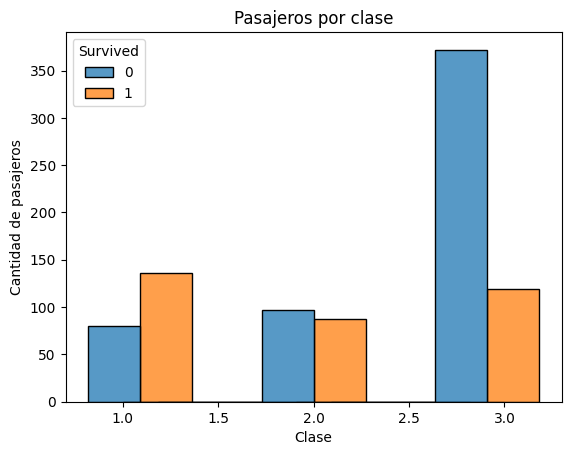

In [14]:
# Gráfico de barras entre la clase del pasajero y si sobrevivió
sns.histplot(x ='Pclass', data=data_raw, hue='Survived', multiple='dodge', shrink=3)
plt.xlabel('Clase')
plt.ylabel('Cantidad de pasajeros')
plt.title('Pasajeros por clase')
plt.show()

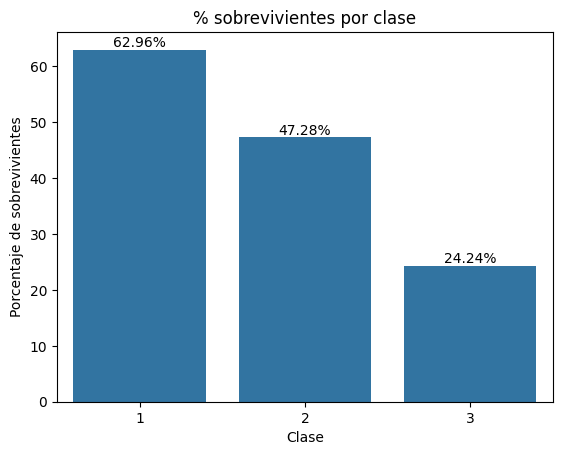

In [15]:
# Porcentaje de pasajeros que sobrevivieron por clase

# Cálcular el porcentaje de pasajeros que sobrevivieron según alguna característica
def porc_survived(df, var1):
  porc_surv = df.groupby(var1)['Survived'].mean()*100
  return porc_surv

porc_surv_pclass = porc_survived(data_raw, 'Pclass')

# Gráfico de barras
ax = sns.barplot(x=porc_surv_pclass.index, y=porc_surv_pclass.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_pclass.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% sobrevivientes por clase')
plt.show()

Acá podemos ver como solo un 24% de los pasajeros que viajaba en 3ra clase no sobrevivió.

En contraste, casi un 63% de los pasajeros que viajaban en 1ra clase si sobrevivió.

#### Sexo

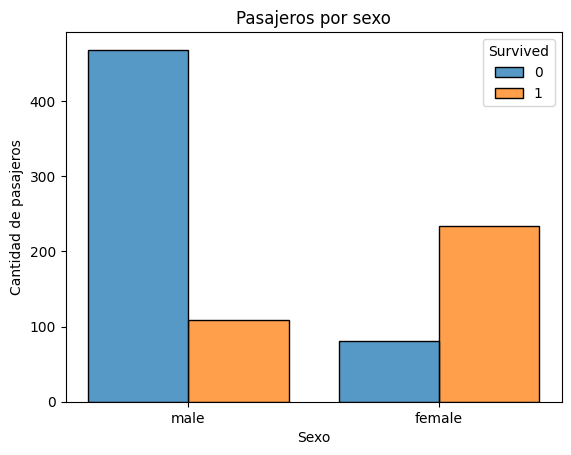

In [16]:
# Gráfico de barras entre el sexo del pasajero y si sobrevivió
sns.histplot(x ='Sex', data=data_raw, hue='Survived', multiple='dodge', shrink=0.8)
plt.xlabel('Sexo')
plt.ylabel('Cantidad de pasajeros')
plt.title('Pasajeros por sexo')
plt.show()

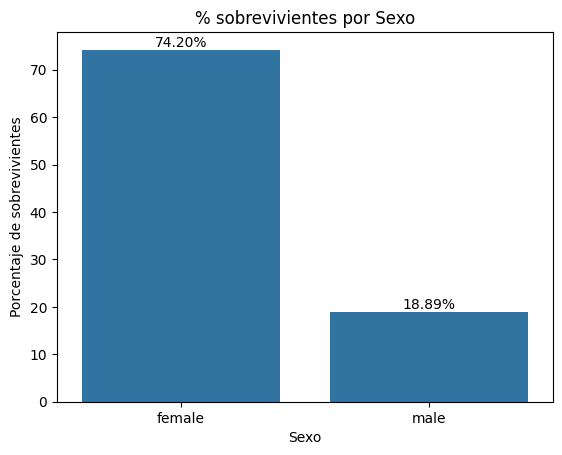

In [17]:
# Porcentaje de pasajeros que sobrevivieron por sexo
porc_surv_sex = porc_survived(data_raw, 'Sex')

# Gráfico de barras
ax = sns.barplot(x=porc_surv_sex.index, y=porc_surv_sex.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_sex.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% sobrevivientes por Sexo')
plt.show()

Acá podemos encontrar otra variable muy influyente en la sobrevivencia de los pasajeros.

Mientras el 74% de las mujeres sobrevivieron, solo el 19% de los hombres se salvaron.

#### Age

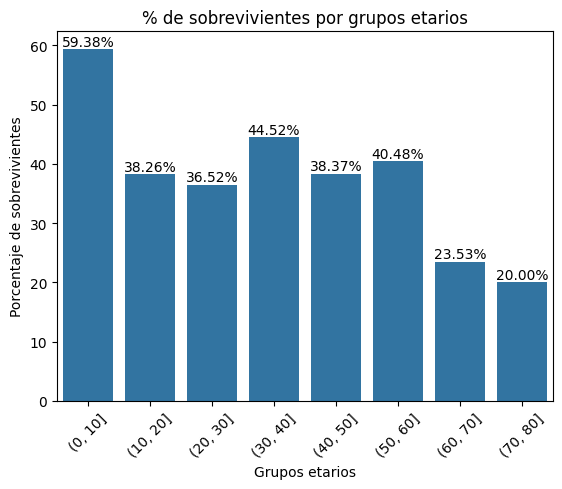

In [18]:
# Calcular la tasa de supervivencia promedio según una característica y definiendo un rango
def porc_survived_range(df, var1, range):
  porc_surv = df.groupby(pd.cut(data_raw[var1], bins=range))['Survived'].mean()*100
  return porc_surv

# Rangos para la edad
age_range = [0, 10, 20, 30, 40, 50, 60, 70, 80]

porc_surv_age = porc_survived_range(data_raw, 'Age', age_range)

# Gráfico de barras
ax = sns.barplot(x=porc_surv_age.index, y=porc_surv_age.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_age.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('Grupos etarios')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% de sobrevivientes por grupos etarios')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

Podemos observar que entre los 10 y 60 años hay un porcentaje de sobrevivencia muy parecido cercano al 40%.

Por contra parte, podemos ver que los niños entre 0 y 10 tienen mayor posibilidades de sobrevivir, cercano al 60%.

Finalmente, posterior a los 60 años, el porcentaje de sobrevivencia disminuye drásticamente cercano al 20%.

#### SibSp

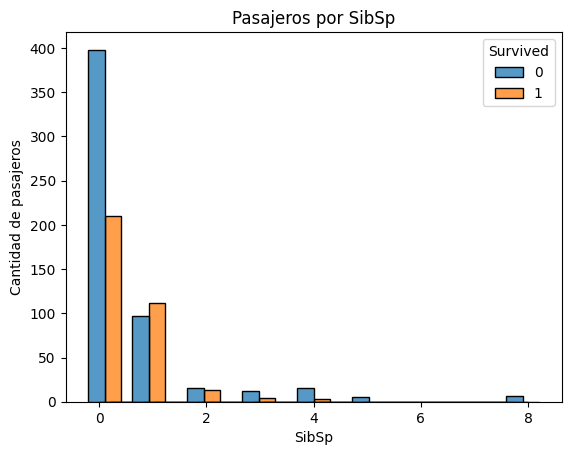

In [19]:
# Gráfico de barras por pasajeros según la cantidad de hermanos/a o esposos/as que tenían a bordo en el Titanic.
sns.histplot(x ='SibSp', data=data_raw, hue='Survived', multiple='dodge', shrink=3)
plt.xlabel('SibSp')
plt.ylabel('Cantidad de pasajeros')
plt.title('Pasajeros por SibSp')
plt.show()

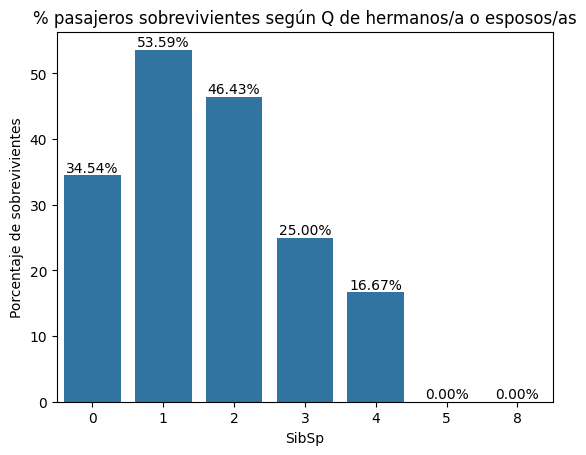

In [20]:
# Porcentaje de pasajeros que sobrevivieron según la cantidad de hermanos/a o esposos/as que tenían a bordo en el Titanic.
porc_surv_sibsp = porc_survived(data_raw, 'SibSp')

# Gráfico de barras
ax = sns.barplot(x=porc_surv_sibsp.index, y=porc_surv_sibsp.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_sibsp.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('SibSp')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% pasajeros sobrevivientes según Q de hermanos/a o esposos/as')
plt.show()

En esta variable, podemos observar que quienes tenían 1 o 2 hermanos/as o esposos/as tenían mayor probababilidad de sobrevivir.

Luego, a medida que aumenta la cantidad de SibSp, el porcentaje de sobrevivencia va disminuyendo cada vez más.

#### Parch

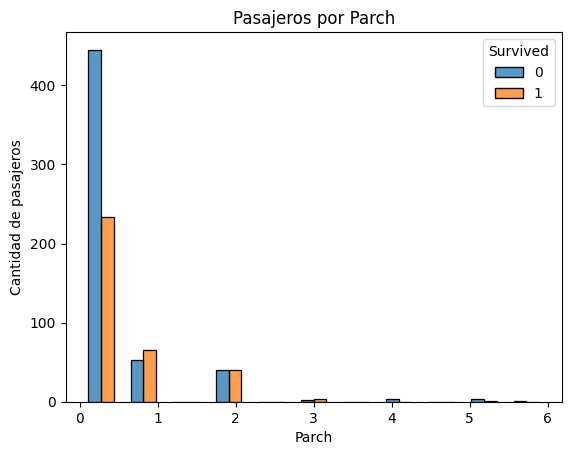

In [21]:
# Gráfico de barras por pasajeros según la cantidad padres o niños/as que tenian a bordo en el Titanic.
sns.histplot(x ='Parch', data=data_raw, hue='Survived', multiple='dodge', shrink=0.6)
plt.xlabel('Parch')
plt.ylabel('Cantidad de pasajeros')
plt.title('Pasajeros por Parch')
plt.show()

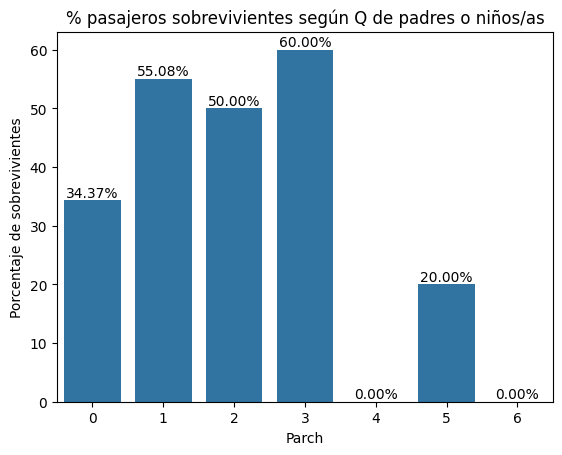

In [22]:
# Porcentaje de pasajeros que sobrevivieron según la cantidad de padres o niños/as que tenían a bordo en el Titanic.
porc_surv_parch = porc_survived(data_raw, 'Parch')

# Gráfico de barras
ax = sns.barplot(x=porc_surv_parch.index, y=porc_surv_parch.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_parch.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('Parch')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% pasajeros sobrevivientes según Q de padres o niños/as')
plt.show()

Acá podemos observar que quienes tenían entre 1 y 3 padres o niños/as tenían mayor probababilidad de sobrevivir.

Luego, para 4 o más el porcentaje de sobrevivencia disminuye drascticamente.

#### Fare

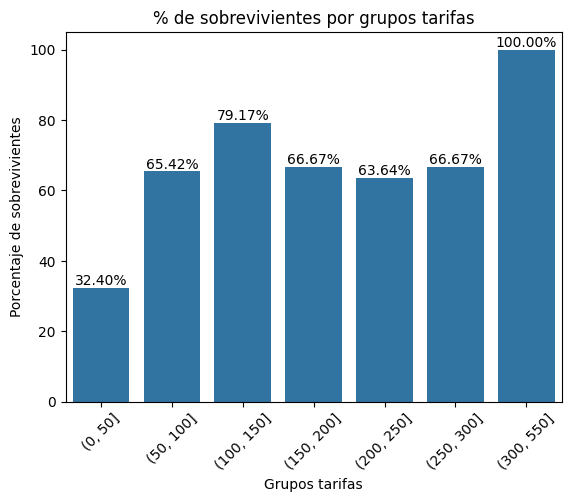

In [23]:
# Rangos para fare
fare_range = [0, 50, 100, 150, 200, 250, 300, 550]

porc_surv_fare = porc_survived_range(data_raw, 'Fare', fare_range)

# Gráfico de barras
ax = sns.barplot(x=porc_surv_fare.index, y=porc_surv_fare.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_fare.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('Grupos tarifas')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% de sobrevivientes por grupos tarifas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

Acá podemos observar que quienes pagaron menos de GBP 50 (Supongamos que eran libras esterlinas 😉) tenían menor probababilidades de sobrevivir. Esto también podría estar relacionado con un pasaje en 3ra clase.

Por otra parte, luego de esa tarifa el porcentaje de sobrevivencia aumenta y se mantiene estable cercano al 65% o más.

### Relación entre variables

In [24]:
# Correlaciones
correlation = data_raw.corr(method='pearson')
print(correlation)

             PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
PassengerId        1.000    -0.005  -0.035  0.037 -0.058 -0.002  0.013
Survived          -0.005     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass            -0.035    -0.338   1.000 -0.369  0.083  0.018 -0.549
Age                0.037    -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp             -0.058    -0.035   0.083 -0.308  1.000  0.415  0.160
Parch             -0.002     0.082   0.018 -0.189  0.415  1.000  0.216
Fare               0.013     0.257  -0.549  0.096  0.160  0.216  1.000


<ipython-input-24-c477b499209d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_raw.corr(method='pearson')


<ipython-input-25-cb117d2cbfec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_raw.corr()


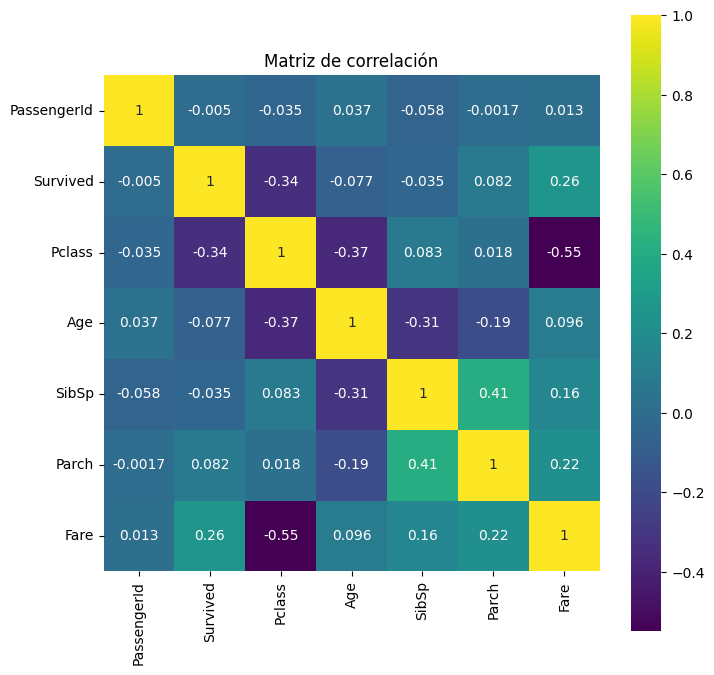

In [25]:
# Matriz de correlación
correlation = data_raw.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap ='viridis')
plt.title("Matriz de correlación")
plt.show()

El atributo con mayor correlación a la clase a pedecir es "Pclass" (0.34) y "Fare" (0.26). Por tanto, la clase del pasajero, en conjunto a cuanto pagaron por el ticket deberían predecir de mejor manera la sobreviviencia de los pasajeros.

Por otra parte, hay una alta correlación entre las características "Pclass" y "Fare" (0.55) y entre "Parch" y "SibSp" (0.415), pero no lo suficiente para pensar en eliminar una de ellas.


## Limpieza de datos

### Modificaciones

Comenzamos a realizar modificaciones en las diferentes caracterísiticas, según lo analizado anteriormente.

In [26]:
# Eliminar la variable "PassengerId"
data_raw = data_raw.drop(columns=['PassengerId'])

data_raw.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [27]:
# Función con patrón de expresión regular para extraer el título del nombre
def extract_name(df, var):
  pattern = r',\s*([^\.]+)\.'
  title_name = df[var].str.extract(pattern, expand=False)
  return title_name

data_raw['title'] = extract_name(data_raw, 'Name')
data_test['title'] = extract_name(data_raw, 'Name')

data_raw.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S,Mr


In [28]:
# Eliminar variable "Name"
data_raw = data_raw.drop(columns=['Name'])
data_test = data_test.drop(columns=['Name'])

data_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,0,3,male,22.0,1,0,A/5 21171,7.250,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.283,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.100,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.050,NaN,S,Mr


In [29]:
# Función para buscar los diferentes título para data_raw
def count_titles(df, var):
  count = df[var].value_counts()
  return count

count_titles_raw = count_titles(data_raw, 'title')
count_titles_raw

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [30]:
# Diferentes títulos para data_test
count_titles_test = count_titles(data_raw, 'title')
count_titles_test

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [31]:
# Hay algunos títulos que se podrían agrupar
data_raw['title'] = data_raw['title'].replace(['Mlle', 'Ms'], 'Miss')
data_raw['title'] = data_raw['title'].replace('Mme', 'Mrs')
data_raw['title'] = data_raw['title'].replace(['Capt', 'Col', 'Major'], 'Military')
data_raw['title'] = data_raw['title'].replace(['Don', 'Sir', 'Jonkheer'], 'Noble')
data_raw['title'] = data_raw['title'].replace(['Lady', 'the Countess'], 'Lady')

data_test['title'] = data_test['title'].replace(['Ms'], 'Miss')
data_test['title'] = data_test['title'].replace(['Col'], 'Military')
data_test['title'] = data_test['title'].replace(['Dona'], 'Lady')

# Revisar nuevamente por títulos diferentes
count_titles_merged_raw = data_raw['title'].value_counts()
count_titles_merged_test = data_test['title'].value_counts()

print(count_titles_merged_raw)
print(count_titles_merged_test)

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Military      5
Noble         3
Lady          2
Name: title, dtype: int64
Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: title, dtype: int64


In [32]:
# Mapear los títulos de los pasajeros
map_title = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Dr': 5,
    'Rev': 6,
    'Military': 7,
    'Noble': 8,
    'Lady': 9
}

data_raw['title_id'] = data_raw['title'].map(map_title)
data_test['title_id'] = data_test['title'].map(map_title)

data_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_id
0,0,3,male,22.0,1,0,A/5 21171,7.250,NaN,S,Mr,1
1,1,1,female,38.0,1,0,PC 17599,71.283,C85,C,Mrs,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,Miss,2
3,1,1,female,35.0,1,0,113803,53.100,C123,S,Mrs,3
4,0,3,male,35.0,0,0,373450,8.050,NaN,S,Mr,1


In [33]:
# Eliminar la variable "title"
data_raw = data_raw.drop(columns=['title'])
data_test = data_test.drop(columns=['title'])

data_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_id
0,0,3,male,22.0,1,0,A/5 21171,7.250,NaN,S,1
1,1,1,female,38.0,1,0,PC 17599,71.283,C85,C,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,2
3,1,1,female,35.0,1,0,113803,53.100,C123,S,3
4,0,3,male,35.0,0,0,373450,8.050,NaN,S,1


In [34]:
# Mapear los sexos de los pasajeros
map_sex = {
    'male': 1,
    'female': 2,
}

data_raw['sex_id'] = data_raw['Sex'].map(map_sex)
data_test['sex_id'] = data_test['Sex'].map(map_sex)

data_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_id,sex_id
0,0,3,male,22.0,1,0,A/5 21171,7.250,NaN,S,1,1
1,1,1,female,38.0,1,0,PC 17599,71.283,C85,C,3,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,2,2
3,1,1,female,35.0,1,0,113803,53.100,C123,S,3,2
4,0,3,male,35.0,0,0,373450,8.050,NaN,S,1,1


In [35]:
# Eliminar la variable "Sex"
data_raw = data_raw.drop(columns=['Sex'])
data_test = data_test.drop(columns=['Sex'])

data_raw.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_id,sex_id
0,0,3,22.0,1,0,A/5 21171,7.250,NaN,S,1,1
1,1,1,38.0,1,0,PC 17599,71.283,C85,C,3,2
2,1,3,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,2,2
3,1,1,35.0,1,0,113803,53.100,C123,S,3,2
4,0,3,35.0,0,0,373450,8.050,NaN,S,1,1


In [36]:
# Para la variable "Age" se modifican sus valores NULL por el promedio
def mean(df, var):
  mean = df[var].mean()
  return mean

data_raw['Age'] = data_raw['Age'].fillna(mean(data_raw, 'Age'))
data_test['Age'] = data_test['Age'].fillna(mean(data_test, 'Age'))

In [37]:
# Revisión de valores valores NULL para "Age" en data_raw
perc_null_raw = perc_null_values(data_raw)
perc_null_raw

Survived     0.00
Pclass       0.00
Age          0.00
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
title_id     0.00
sex_id       0.00
dtype: float64

In [38]:
# Revisión de valores NULL para "Age" en data_test
perc_null_test = perc_null_values(data_test)
perc_null_test

PassengerId     0.00
Pclass          0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
title_id        0.48
sex_id          0.00
dtype: float64

In [39]:
# Función para unificar las variables "SibSp" y "Parch"
def var_sum (df, var1, var2):
  sum = df[var1] + df[var2]
  return sum

family_size_raw = var_sum(data_raw, 'SibSp', 'Parch')
family_size_test = var_sum(data_test, 'SibSp', 'Parch')

data_raw['family_size'] = family_size_raw
data_test['family_size'] = family_size_test

data_raw.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_id,sex_id,family_size
0,0,3,22.0,1,0,A/5 21171,7.250,NaN,S,1,1,1
1,1,1,38.0,1,0,PC 17599,71.283,C85,C,3,2,1
2,1,3,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,2,2,0
3,1,1,35.0,1,0,113803,53.100,C123,S,3,2,1
4,0,3,35.0,0,0,373450,8.050,NaN,S,1,1,0


In [40]:
# Función para crear nueva variable que identifique si el pasajero viaja solo
map_family_size = lambda x: 0 if x == 0 else 1

data_raw['is_alone'] = data_raw['family_size'].map(map_family_size)
data_test['is_alone'] = data_test['family_size'].map(map_family_size)

data_raw.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title_id,sex_id,family_size,is_alone
0,0,3,22.0,1,0,A/5 21171,7.250,NaN,S,1,1,1,1
1,1,1,38.0,1,0,PC 17599,71.283,C85,C,3,2,1,1
2,1,3,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,2,2,0,0
3,1,1,35.0,1,0,113803,53.100,C123,S,3,2,1,1
4,0,3,35.0,0,0,373450,8.050,NaN,S,1,1,0,0


In [41]:
# Eliminar las variables de "SibSp" y "Parch"
data_raw = data_raw.drop(columns=['SibSp'])
data_test = data_test.drop(columns=['SibSp'])

data_raw = data_raw.drop(columns=['Parch'])
data_test = data_test.drop(columns=['Parch'])

data_raw.head()

,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,title_id,sex_id,family_size,is_alone
0,0,3,22.0,A/5 21171,7.250,NaN,S,1,1,1,1
1,1,1,38.0,PC 17599,71.283,C85,C,3,2,1,1
2,1,3,26.0,STON/O2. 3101282,7.925,NaN,S,2,2,0,0
3,1,1,35.0,113803,53.100,C123,S,3,2,1,1
4,0,3,35.0,373450,8.050,NaN,S,1,1,0,0


In [42]:
# Eliminar la variable "Ticket"
data_raw = data_raw.drop(columns=['Ticket'])
data_test = data_test.drop(columns=['Ticket'])

data_raw.head()

,Survived,Pclass,Age,Fare,Cabin,Embarked,title_id,sex_id,family_size,is_alone
0,0,3,22.0,7.250,NaN,S,1,1,1,1
1,1,1,38.0,71.283,C85,C,3,2,1,1
2,1,3,26.0,7.925,NaN,S,2,2,0,0
3,1,1,35.0,53.100,C123,S,3,2,1,1
4,0,3,35.0,8.050,NaN,S,1,1,0,0


In [43]:
# Eliminar la variable "Cabin"
data_raw = data_raw.drop(columns=['Cabin'])
data_test = data_test.drop(columns=['Cabin'])

data_raw.head()

,Survived,Pclass,Age,Fare,Embarked,title_id,sex_id,family_size,is_alone
0,0,3,22.0,7.250,S,1,1,1,1
1,1,1,38.0,71.283,C,3,2,1,1
2,1,3,26.0,7.925,S,2,2,0,0
3,1,1,35.0,53.100,S,3,2,1,1
4,0,3,35.0,8.050,S,1,1,0,0


In [44]:
# Mapear la variable "Embarked"
map_embarked = {
    'C': 1,
    'Q': 2,
    'S': 3,
}

data_raw['embarked_id'] = data_raw['Embarked'].map(map_embarked)
data_test['embarked_id'] = data_test['Embarked'].map(map_embarked)

data_raw.head()

,Survived,Pclass,Age,Fare,Embarked,title_id,sex_id,family_size,is_alone,embarked_id
0,0,3,22.0,7.250,S,1,1,1,1,3.0
1,1,1,38.0,71.283,C,3,2,1,1,1.0
2,1,3,26.0,7.925,S,2,2,0,0,3.0
3,1,1,35.0,53.100,S,3,2,1,1,3.0
4,0,3,35.0,8.050,S,1,1,0,0,3.0


In [45]:
# Eliminar la variable "Embarked"
data_raw = data_raw.drop(columns=['Embarked'])
data_test = data_test.drop(columns=['Embarked'])

data_raw.head()

,Survived,Pclass,Age,Fare,title_id,sex_id,family_size,is_alone,embarked_id
0,0,3,22.0,7.250,1,1,1,1,3.0
1,1,1,38.0,71.283,3,2,1,1,1.0
2,1,3,26.0,7.925,2,2,0,0,3.0
3,1,1,35.0,53.100,3,2,1,1,3.0
4,0,3,35.0,8.050,1,1,0,0,3.0


In [47]:
# Verificar valores NULL en la variable "embarked_id"
perc_null_raw = perc_null_values(data_raw)
perc_null_raw

Survived       0.00
Pclass         0.00
Age            0.00
Fare           0.00
title_id       0.00
sex_id         0.00
family_size    0.00
is_alone       0.00
embarked_id    0.22
dtype: float64

In [48]:
# Al ser una variable con 3 clases, su promedio entrega un valor decimal
data_raw.describe()

,Survived,Pclass,Age,Fare,title_id,sex_id,family_size,is_alone,embarked_id
count,891.000,891.000,891.000,891.000,891.000,891.000,891.000,891.000,889.000
mean,0.384,2.309,29.699,32.204,1.765,1.352,0.905,0.397,2.535
std,0.487,0.836,13.002,49.693,1.182,0.478,1.613,0.490,0.792
min,0.000,1.000,0.420,0.000,1.000,1.000,0.000,0.000,1.000
25%,0.000,2.000,22.000,7.910,1.000,1.000,0.000,0.000,2.000
50%,0.000,3.000,29.699,14.454,1.000,1.000,0.000,0.000,3.000
75%,1.000,3.000,35.000,31.000,2.000,2.000,1.000,1.000,3.000
max,1.000,3.000,80.000,512.329,9.000,2.000,10.000,1.000,3.000


In [46]:
# Por tanto, se utilizará la madiana que corresponde a "3" para reemplazar los valores NULL

# Función para buscar la mediana y reemplazar los valores NULL
def median(df, var):
  median = df[var].median()
  return median

data_raw['embarked_id'] = data_raw['embarked_id'].fillna(median(data_raw, 'embarked_id'))
data_test['embarked_id'] = data_test['embarked_id'].fillna(median(data_test, 'embarked_id'))


# Revisión de valores NULL
perc_null_raw = perc_null_values(data_raw)
perc_null_raw

Survived       0.0
Pclass         0.0
Age            0.0
Fare           0.0
title_id       0.0
sex_id         0.0
family_size    0.0
is_alone       0.0
embarked_id    0.0
dtype: float64

In [47]:
# Verificar valores NULL en el data_test
perc_null_test = perc_null_values(data_test)
perc_null_test

PassengerId    0.00
Pclass         0.00
Age            0.00
Fare           0.24
title_id       0.48
sex_id         0.00
family_size    0.00
is_alone       0.00
embarked_id    0.00
dtype: float64

In [49]:
# En el caso de "Fare", por su alta desviación estándar, podemos utilizar su mediana para reemplazar los valores NULL
data_test.describe()

,PassengerId,Pclass,Age,Fare,title_id,sex_id,family_size,is_alone,embarked_id
count,418.00,418.000,418.000,418.000,416.000,418.000,418.000,418.000,418.000
mean,1100.50,2.266,30.273,35.577,1.752,1.364,0.840,0.395,2.402
std,120.81,0.842,12.635,55.850,1.015,0.482,1.519,0.489,0.854
min,892.00,1.000,0.170,0.000,1.000,1.000,0.000,0.000,1.000
25%,996.25,1.000,23.000,7.896,1.000,1.000,0.000,0.000,2.000
50%,1100.50,3.000,30.273,14.454,1.000,1.000,0.000,0.000,3.000
75%,1204.75,3.000,35.750,31.472,2.000,2.000,1.000,1.000,3.000
max,1309.00,3.000,76.000,512.329,6.000,2.000,10.000,1.000,3.000


In [48]:
# se buca la mediana y se reemplazan los valores NULL
data_test['Fare'] = data_test['Fare'].fillna(median(data_test, 'Fare'))

# Verificar nuevamente los valores NULL
perc_null_test = perc_null_values(data_test)
perc_null_test

PassengerId    0.00
Pclass         0.00
Age            0.00
Fare           0.00
title_id       0.48
sex_id         0.00
family_size    0.00
is_alone       0.00
embarked_id    0.00
dtype: float64

In [50]:
# Con respecto a "title_id", al ser varias clases no es posible utilizar el promedio, por lo cual también se utilizará la mediana

data_test['title_id'] = data_test['title_id'].fillna(median(data_test, 'title_id'))

# Verificar nuevamente los valores NULL
perc_null_test = perc_null_values(data_test)
perc_null_test

PassengerId    0.0
Pclass         0.0
Age            0.0
Fare           0.0
title_id       0.0
sex_id         0.0
family_size    0.0
is_alone       0.0
embarked_id    0.0
dtype: float64

In [51]:
# Función para cambiar las mayúsculas a minúsculas y seguir camel case.
def convertir_de_minusculas_a_mayusculas(texto):
    nuevo_texto = ''
    for letra in texto:
        if letra.isupper():
            nuevo_texto += letra.lower()
        else:
            nuevo_texto += letra
    return nuevo_texto

data_cleaned = data_raw.rename(columns=lambda x: convertir_de_minusculas_a_mayusculas(x))
data_cleaned.head()

,survived,pclass,age,fare,title_id,sex_id,family_size,is_alone,embarked_id
0,0,3,22.0,7.250,1,1,1,1,3.0
1,1,1,38.0,71.283,3,2,1,1,1.0
2,1,3,26.0,7.925,2,2,0,0,3.0
3,1,1,35.0,53.100,3,2,1,1,3.0
4,0,3,35.0,8.050,1,1,0,0,3.0


In [52]:
data_test = data_test.rename(columns=lambda x: convertir_de_minusculas_a_mayusculas(x))
data_test.head()

,passengerid,pclass,age,fare,title_id,sex_id,family_size,is_alone,embarked_id
0,892,3,34.5,7.829,1.0,1,0,0,2
1,893,3,47.0,7.000,3.0,2,1,1,3
2,894,2,62.0,9.688,2.0,1,0,0,2
3,895,3,27.0,8.662,3.0,1,0,0,3
4,896,3,22.0,12.287,1.0,2,2,1,3


In [53]:
# Finalmente, se mueve la variable a predecir (survived) al final.

columna_a_mover = data_cleaned.pop('survived')

# Insertar la columna al final del DataFrame
data_cleaned.insert(len(data_cleaned.columns), 'survived', columna_a_mover)
data_cleaned.head()

,pclass,age,fare,title_id,sex_id,family_size,is_alone,embarked_id,survived
0,3,22.0,7.250,1,1,1,1,3.0,0
1,1,38.0,71.283,3,2,1,1,1.0,1
2,3,26.0,7.925,2,2,0,0,3.0,1
3,1,35.0,53.100,3,2,1,1,3.0,1
4,3,35.0,8.050,1,1,0,0,3.0,0


In [54]:
# Verificar los tipos de datos
data_cleaned.dtypes

pclass           int64
age            float64
fare           float64
title_id         int64
sex_id           int64
family_size      int64
is_alone         int64
embarked_id    float64
survived         int64
dtype: object

In [55]:
data_test.dtypes

passengerid      int64
pclass           int64
age            float64
fare           float64
title_id       float64
sex_id           int64
family_size      int64
is_alone         int64
embarked_id      int64
dtype: object

In [56]:
# Modificar 'embarked_id' del data_raw a int
data_cleaned['embarked_id'] = data_cleaned['embarked_id'].astype(int)
data_cleaned.dtypes

pclass           int64
age            float64
fare           float64
title_id         int64
sex_id           int64
family_size      int64
is_alone         int64
embarked_id      int64
survived         int64
dtype: object

In [57]:
# Modificar 'title_id' del data_test a int
data_test['title_id'] = data_test['title_id'].astype(int)
data_test.dtypes

passengerid      int64
pclass           int64
age            float64
fare           float64
title_id         int64
sex_id           int64
family_size      int64
is_alone         int64
embarked_id      int64
dtype: object

### Análisis datos limpios

In [58]:
data_cleaned.head()

,pclass,age,fare,title_id,sex_id,family_size,is_alone,embarked_id,survived
0,3,22.0,7.250,1,1,1,1,3,0
1,1,38.0,71.283,3,2,1,1,1,1
2,3,26.0,7.925,2,2,0,0,3,1
3,1,35.0,53.100,3,2,1,1,3,1
4,3,35.0,8.050,1,1,0,0,3,0


<Axes: xlabel='survived', ylabel='Density'>

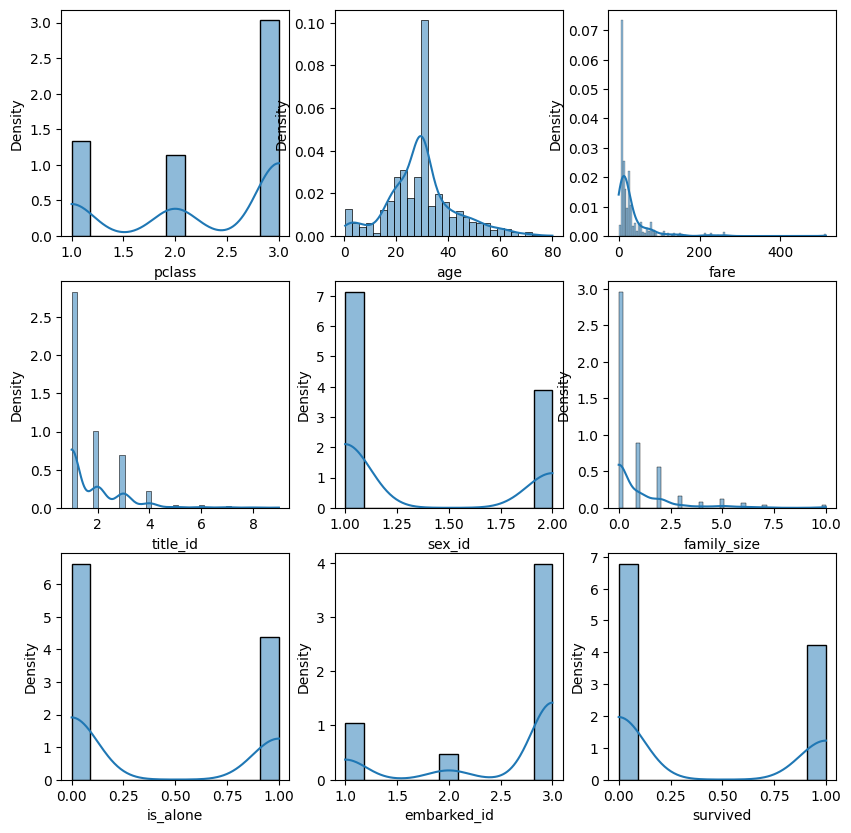

In [59]:
# Histograma por variable
f, ax = plt.subplots(3,3,figsize=(10,10))
sns.histplot(data_cleaned["pclass"], ax = ax[0,0], kde=True, stat="density")
sns.histplot(data_cleaned["age"], ax = ax[0,1], kde=True, stat="density")
sns.histplot(data_cleaned["fare"], ax = ax[0,2], kde=True, stat="density")
sns.histplot(data_cleaned["title_id"], ax = ax[1,0], kde=True, stat="density")
sns.histplot(data_cleaned["sex_id"], ax = ax[1,1], kde=True, stat="density")
sns.histplot(data_cleaned["family_size"], ax = ax[1,2], kde=True, stat="density")
sns.histplot(data_cleaned["is_alone"], ax = ax[2,0], kde=True, stat="density")
sns.histplot(data_cleaned["embarked_id"], ax = ax[2,1], kde=True, stat="density")
sns.histplot(data_cleaned["survived"], ax = ax[2,2], kde=True, stat="density")

<Axes: ylabel='survived'>

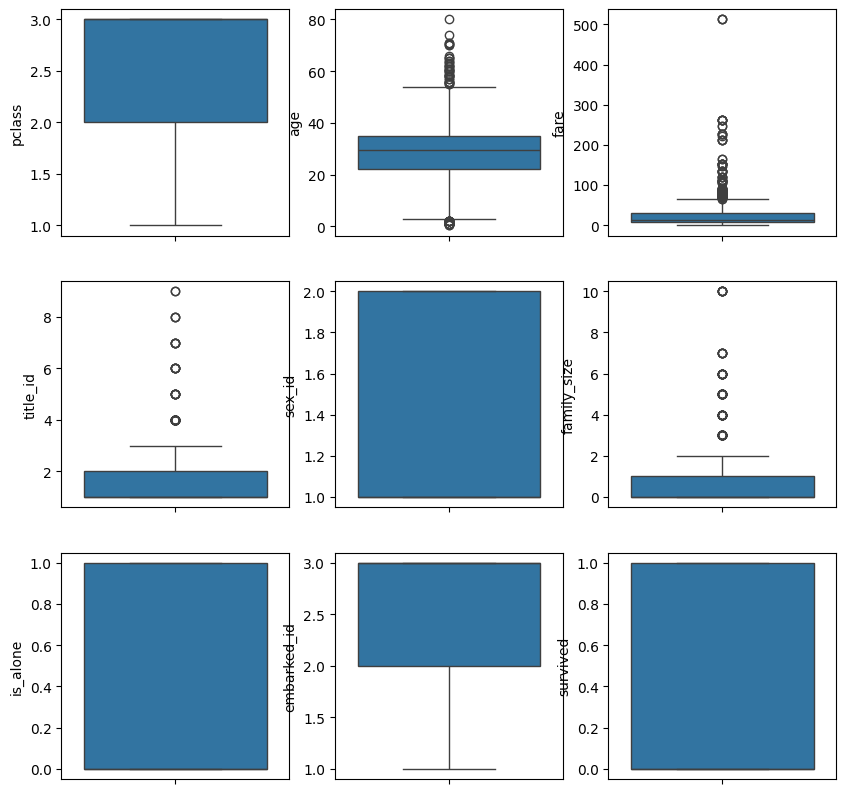

In [60]:
# Boxplots por variable

f, ax = plt.subplots(3,3,figsize=(10,10))
sns.boxplot(data_cleaned["pclass"], ax = ax[0,0])
sns.boxplot(data_cleaned["age"], ax = ax[0,1])
sns.boxplot(data_cleaned["fare"], ax = ax[0,2])
sns.boxplot(data_cleaned["title_id"], ax = ax[1,0])
sns.boxplot(data_cleaned["sex_id"], ax = ax[1,1])
sns.boxplot(data_cleaned["family_size"], ax = ax[1,2])
sns.boxplot(data_cleaned["is_alone"], ax = ax[2,0])
sns.boxplot(data_cleaned["embarked_id"], ax = ax[2,1])
sns.boxplot(data_cleaned["survived"], ax = ax[2,2])

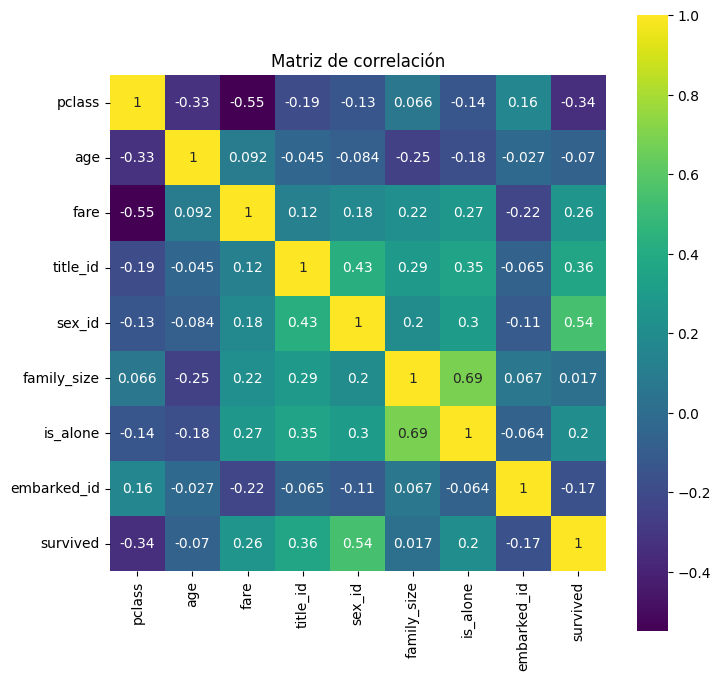

In [61]:
# Matriz de correlación
correlation = data_cleaned.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap ='viridis')
plt.title("Matriz de correlación")
plt.show()

Ahora, podemos observar que las variables con mayor correlación a "survived" son "sex_id" (0,54), "title_id" (0.36) y "pclass" (0.34).

Por otra parte, las variables con mayor correlación entre sí, son "family_size" e "is_alone" (0.69) y "fare" con "pclass" (0.55). En ambos casos son  entendibles dada la dependiencia que existe entre una clase y otra.

In [62]:
# Por la alta correlación entre sí ("is_alone" y "family_size"), se eliminará "family_size" que tiene menor correlación con la variable a predecir.
data_cleaned = data_cleaned.drop(columns=['family_size'])
data_test = data_test.drop(columns=['family_size'])

data_cleaned.head()

,pclass,age,fare,title_id,sex_id,is_alone,embarked_id,survived
0,3,22.0,7.250,1,1,1,3,0
1,1,38.0,71.283,3,2,1,1,1
2,3,26.0,7.925,2,2,0,3,1
3,1,35.0,53.100,3,2,1,3,1
4,3,35.0,8.050,1,1,0,3,0


#### title_id

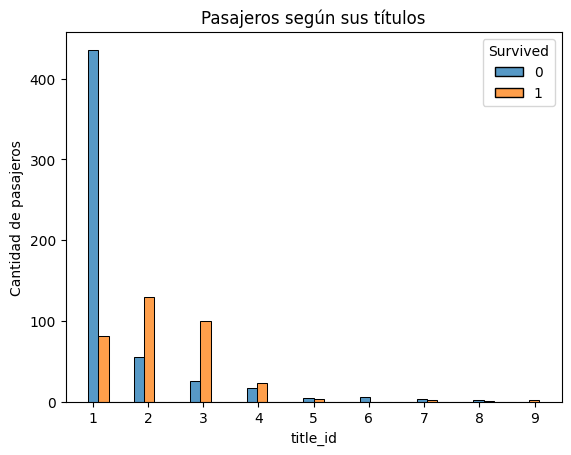

In [63]:
# Gráfico de barras entre el título del pasajero y si sobrevivió
sns.histplot(x ='title_id', data=data_raw, hue='Survived', multiple='dodge', shrink=1.8)
plt.xlabel('title_id')
plt.ylabel('Cantidad de pasajeros')
plt.title('Pasajeros según sus títulos')
plt.show()

Recordar que los títulos son los siguientes:
* Mr: 1
* Miss: 2
* Mrs: 3
* Master: 4
* Dr: 5
* Rev: 6
* Military: 7
* Noble: 8
* Lady: 9

Como se puede observar, desde el título 5 en adelante, la muestra es muy pequeña.

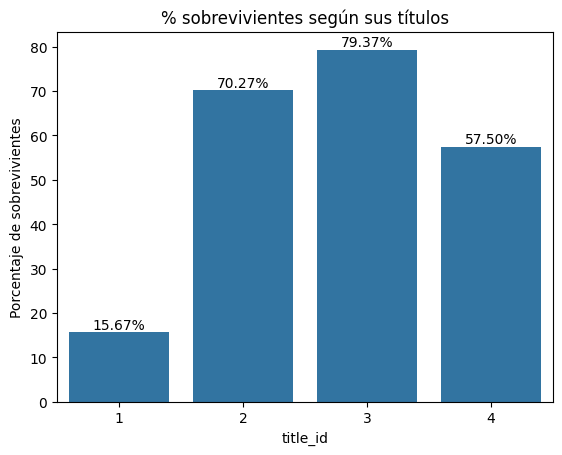

In [64]:
# Porcentaje de pasajeros que sobrevivieron según su título
porc_surv_title = porc_survived(data_raw, 'title_id')
porc_surv_title_4 = porc_surv_title.iloc[:4]

# Gráfico de barras
ax = sns.barplot(x=porc_surv_title_4.index, y=porc_surv_title_4.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_title_4.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('title_id')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% sobrevivientes según sus títulos')
plt.show()



Dentro de los 4 primeros títulos (grupos con una muestra significativa), destaca el título 3 de "Mrs" con casi un 80% de sobreviviencia, seguido por el título 2 de "Miss" con un 70% de sobrevivencia.

Es importante tener en consideración que ambos títulos corresponden a mujeres y la diferencia corresponde a su estado civil. Normalmente, "Miss" se refiere a una mujer soltera, mientras que "Mrs" se refiere a una mujer casada.

#### embarked_id

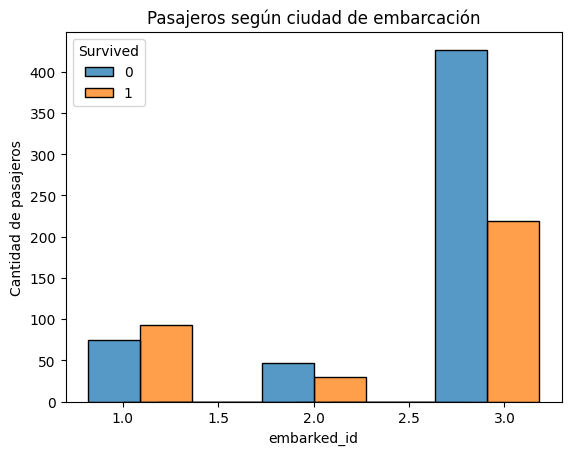

In [65]:
# Gráfico de barras entre la ciudad donde embarco el pasajero y si sobrevivió
sns.histplot(x ='embarked_id', data=data_raw, hue='Survived', multiple='dodge', shrink=3)
plt.xlabel('embarked_id')
plt.ylabel('Cantidad de pasajeros')
plt.title('Pasajeros según ciudad de embarcación')
plt.show()

Recordar que las ciudades donde embarcaron son las siguientes:
* Cherbourg (C): 1
* Queenstown (Q): 2
* Southampton (S): 3

Por otra parte, el Titanic comenzó en su travesia en Southampton (Reino Unido), luego se trasladó a Cherburgo (Francia) y finalmente a Queenstown (actual Cobh), en Irlanda, antes de poner rumbo hacia Nueva York (EEUU)

En el gráfico, podemos observar, que la mayoría de los pasajeros embarco en Southampton.

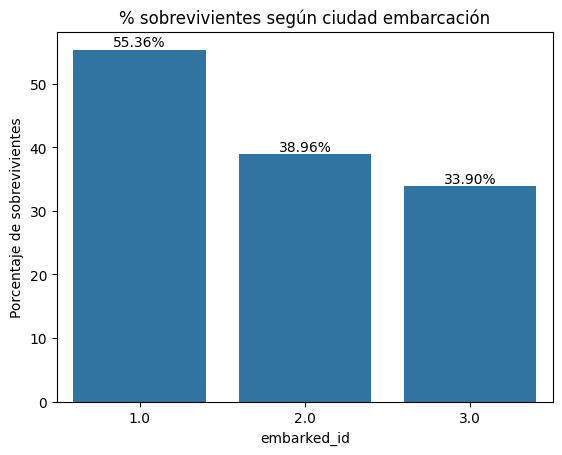

In [66]:
# Porcentaje de pasajeros que sobrevivieron según su ciudad de embarcación
porc_surv_embarked = porc_survived(data_raw, 'embarked_id')

# Gráfico de barras
ax = sns.barplot(x=porc_surv_embarked.index, y=porc_surv_embarked.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_embarked.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('embarked_id')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% sobrevivientes según ciudad embarcación')
plt.show()

Acá, podemos apreciar que los pasajeros que embarcaron en Cherburgo (Francia) tienen un mayor porcentaje de sobrevivencia con un 55%.

Podemos visualizar que quienes viajaban con 3 familiares tenian mayores probabilidades de sobrevivir que el resto y es muy grande la diferencia en comparación a quienes viajaban solos.

#### is_alone

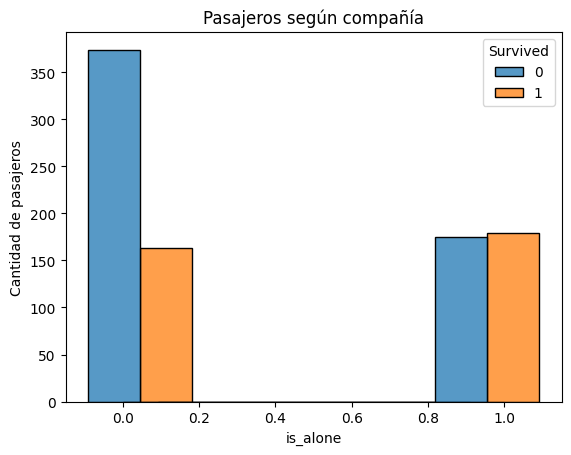

In [67]:
# Gráfico de barras entre la ciudad donde embarco el pasajero y si sobrevivió
sns.histplot(x ='is_alone', data=data_raw, hue='Survived', multiple='dodge', shrink=3)
plt.xlabel('is_alone')
plt.ylabel('Cantidad de pasajeros')
plt.title('Pasajeros según compañía')
plt.show()

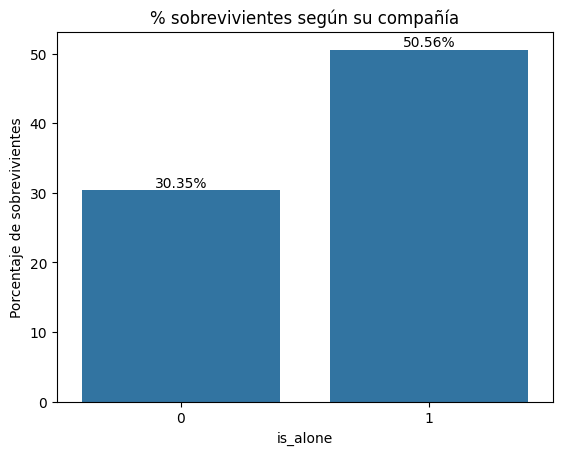

In [68]:
# Porcentaje de pasajeros que sobrevivieron según su ciudad de embarcación
porc_surv_alone = porc_survived(data_raw, 'is_alone')

# Gráfico de barras
ax = sns.barplot(x=porc_surv_alone.index, y=porc_surv_alone.values)
ax.bar_label(ax.containers[0], labels=[f'{v:.2f}%' for v in porc_surv_alone.values], fontsize=10)

# Establecer etiquetas y título
plt.xlabel('is_alone')
plt.ylabel('Porcentaje de sobrevivientes')
plt.title('% sobrevivientes según su compañía')
plt.show()

Como mencionamos anteriormente, efectivamente era más probable sobrevivir viajando en compañía, que viajando solo.

## Preprocesamiento

Existen variable como "Fare" con valores muy altos correspondientes a lo que pagó cada pasajero y otras variables con valores muy bajos, como la clase en la cual viajaba cada pasajero (1, 2 o 3)

Por lo anterior, es necesario hacer un preprocesamiento de los datos antes de aplicar módelos.

### Estandarización

In [70]:
# Nombres de las columnas
columns_names = data_cleaned.columns.tolist()

# Se transforma el DF en un array para luego separar las variables en X e Y. X corresponderá a las características que nos ayudarán a predecir Y.
array = data_cleaned.values
X_train = array[:,0:7]
Y_train = array[:,7]

# Luego se estandarizan las variables dentro de X, las cuales tendrán una media de 0 y una desviación estándar de 1.
scaler = StandardScaler().fit(X_train)
standardscalerX = scaler.transform(X_train)

# Se verifican las columnas y los datos de las variables en X ya normalizados
print(columns_names[0:8])
print(standardscalerX[0:5, :])

['pclass', 'age', 'fare', 'title_id', 'sex_id', 'is_alone', 'embarked_id', 'survived']
[[ 0.82737724 -0.5924806  -0.50244517 -0.64779806 -0.73769513  1.2316449
   0.58595414]
 [-1.56610693  0.63878901  0.78684529  1.04483558  1.35557354  1.2316449
  -1.9423032 ]
 [ 0.82737724 -0.2846632  -0.48885426  0.19851876  1.35557354 -0.81192233
   0.58595414]
 [-1.56610693  0.40792596  0.42073024  1.04483558  1.35557354  1.2316449
   0.58595414]
 [ 0.82737724  0.40792596 -0.48633742 -0.64779806 -0.73769513 -0.81192233
   0.58595414]]


In [71]:
# Nuevo DF
standardscaler_df = pd.DataFrame(data = standardscalerX, columns = ['pclass','age','fare','title_id', 'sex_id', 'is_alone', 'embarked_id'])
standardscaler_df.head()

,pclass,age,fare,title_id,sex_id,is_alone,embarked_id
0,0.827,-0.592,-0.502,-0.648,-0.738,1.232,0.586
1,-1.566,0.639,0.787,1.045,1.356,1.232,-1.942
2,0.827,-0.285,-0.489,0.199,1.356,-0.812,0.586
3,-1.566,0.408,0.421,1.045,1.356,1.232,0.586
4,0.827,0.408,-0.486,-0.648,-0.738,-0.812,0.586


In [72]:
# Nuevo DF a un array.
columns_names = standardscaler_df.columns.tolist()

array = standardscaler_df.values
X_est = array[:,0:7]

print(columns_names)
print(X_est[0:5, :])

['pclass', 'age', 'fare', 'title_id', 'sex_id', 'is_alone', 'embarked_id']
[[ 0.82737724 -0.5924806  -0.50244517 -0.64779806 -0.73769513  1.2316449
   0.58595414]
 [-1.56610693  0.63878901  0.78684529  1.04483558  1.35557354  1.2316449
  -1.9423032 ]
 [ 0.82737724 -0.2846632  -0.48885426  0.19851876  1.35557354 -0.81192233
   0.58595414]
 [-1.56610693  0.40792596  0.42073024  1.04483558  1.35557354  1.2316449
   0.58595414]
 [ 0.82737724  0.40792596 -0.48633742 -0.64779806 -0.73769513 -0.81192233
   0.58595414]]


<Axes: xlabel='embarked_id', ylabel='Count'>

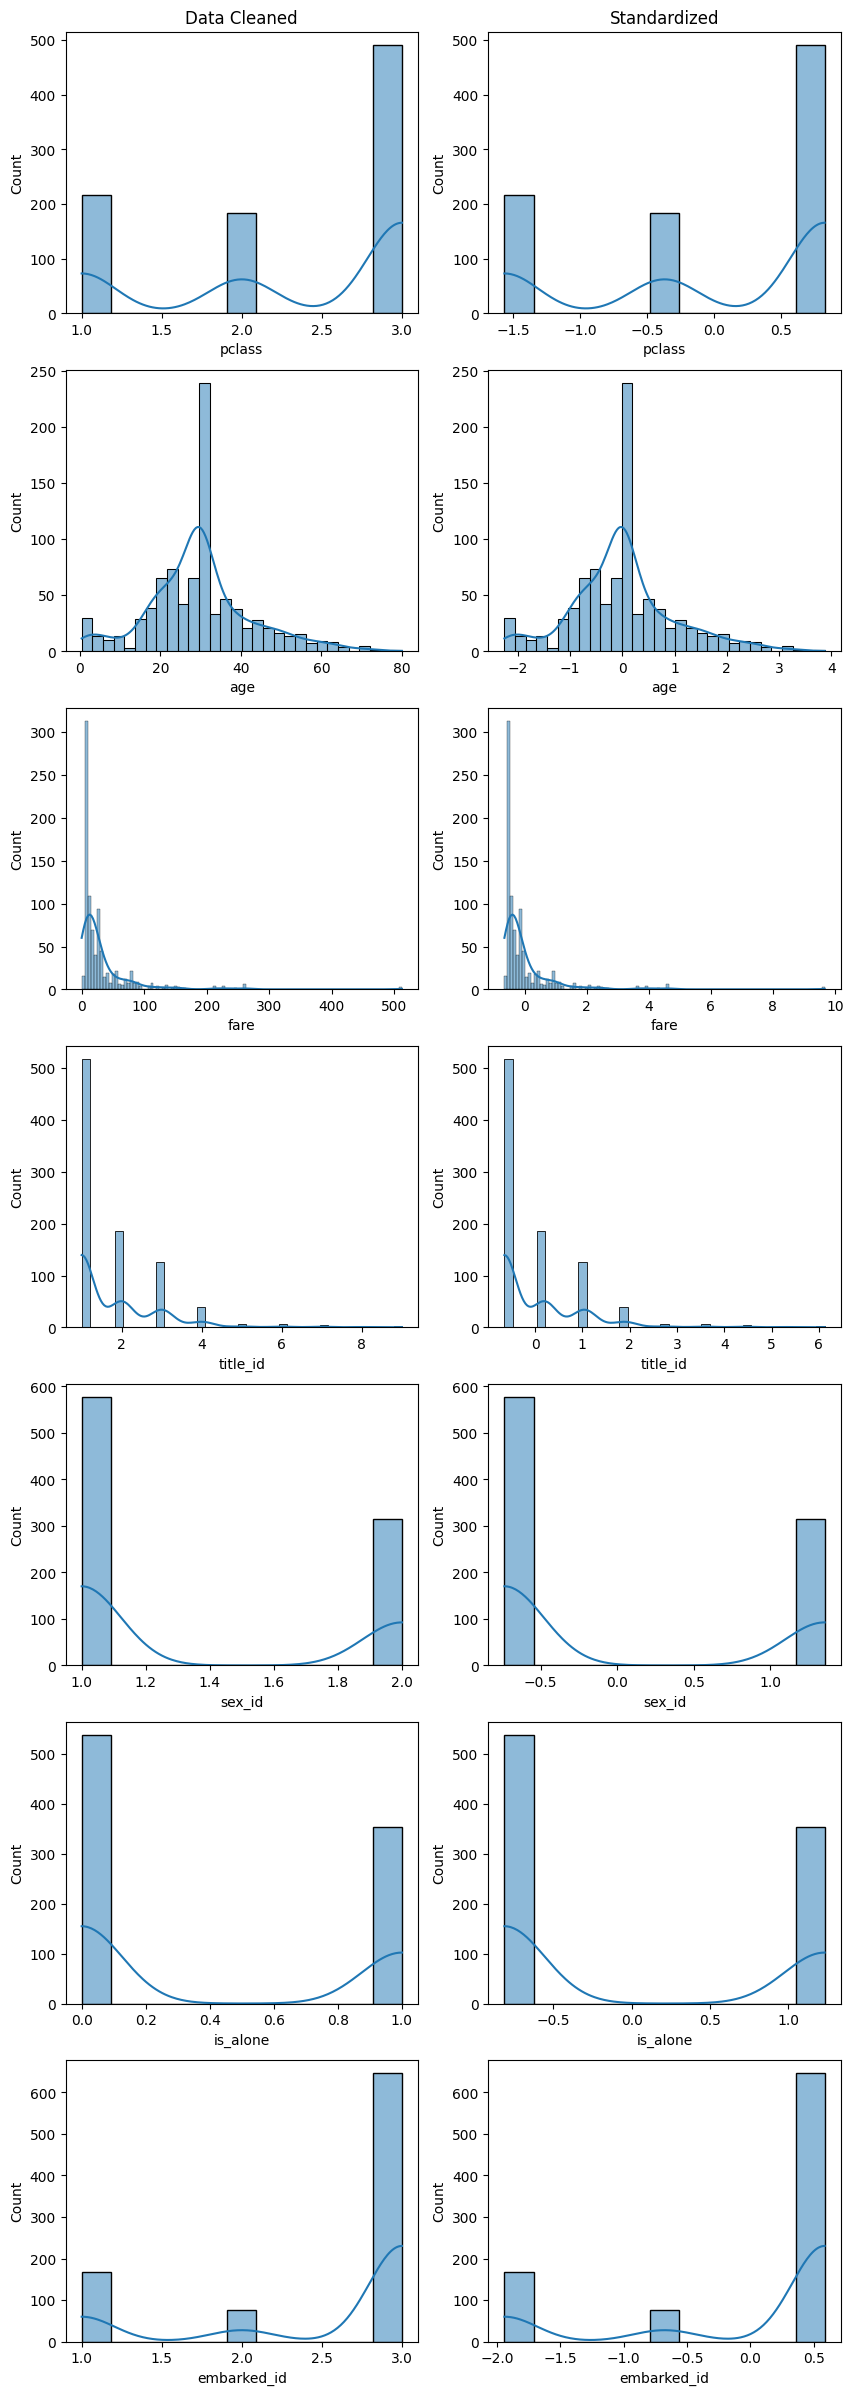

In [73]:
# Gráfico para comparar las variables limpias y las variables estandarizadas

f, axes = plt.subplots(7, 2, figsize=(10, 30))

sns.histplot(data_cleaned["pclass"], kde=True, ax=axes[0, 0]).set(title='Data Cleaned')
sns.histplot(standardscaler_df["pclass"], kde=True, ax=axes[0, 1]).set(title='Standardized')

sns.histplot(data_cleaned["age"], kde=True, ax=axes[1, 0])
sns.histplot(standardscaler_df["age"], kde=True, ax=axes[1, 1])

sns.histplot(data_cleaned["fare"], kde=True, ax=axes[2, 0])
sns.histplot(standardscaler_df["fare"], kde=True, ax=axes[2, 1])

sns.histplot(data_cleaned["title_id"], kde=True, ax=axes[3, 0])
sns.histplot(standardscaler_df["title_id"], kde=True, ax=axes[3, 1])

sns.histplot(data_cleaned["sex_id"], kde=True, ax=axes[4, 0])
sns.histplot(standardscaler_df["sex_id"], kde=True, ax=axes[4, 1])

sns.histplot(data_cleaned["is_alone"], kde=True, ax=axes[5, 0])
sns.histplot(standardscaler_df["is_alone"], kde=True, ax=axes[5, 1])

sns.histplot(data_cleaned["embarked_id"], kde=True, ax=axes[6, 0])
sns.histplot(standardscaler_df["embarked_id"], kde=True, ax=axes[6, 1])


No se aprecian cambios significantes

### Normalización

In [74]:
# Definir los nombres de las columnas
columns_names = data_cleaned.columns.tolist()

# Se transforma el DF en un array para luego separar las variables en X e Y. X corresponderá a las características que nos ayudarán a predecir Y.
array = data_cleaned.values
X_train = array[:,0:7]
Y_train = array[:,7]

# Estandarización de las variables dentro de X, las cuales tendrán un valor entre 0 y 1.
scaler = Normalizer().fit(X_train)
normalizedX = scaler.transform(X_train)

print(columns_names[0:7])
print(normalizedX[0:5, :])

['pclass', 'age', 'fare', 'title_id', 'sex_id', 'is_alone', 'embarked_id']
[[0.12704994 0.93169959 0.30703736 0.04234998 0.04234998 0.04234998
  0.12704994]
 [0.01236425 0.46984139 0.88136433 0.03709274 0.02472849 0.01236425
  0.01236425]
 [0.10847901 0.94015143 0.28656539 0.07231934 0.07231934 0.
  0.10847901]
 [0.01567751 0.5487127  0.83247556 0.04703252 0.03135501 0.01567751
  0.04703252]
 [0.08289309 0.96708609 0.2224298  0.02763103 0.02763103 0.
  0.08289309]]


In [75]:
normalized_df = pd.DataFrame(data = normalizedX, columns = ['pclass','age','fare','title_id', 'sex_id', 'is_alone', 'embarked_id'])
normalized_df.head()

,pclass,age,fare,title_id,sex_id,is_alone,embarked_id
0,0.127,0.932,0.307,0.042,0.042,0.042,0.127
1,0.012,0.470,0.881,0.037,0.025,0.012,0.012
2,0.108,0.940,0.287,0.072,0.072,0.000,0.108
3,0.016,0.549,0.832,0.047,0.031,0.016,0.047
4,0.083,0.967,0.222,0.028,0.028,0.000,0.083


In [76]:
# Se transforma el nuevo DF en un array.
columns_names = normalized_df.columns.tolist()

array = normalized_df.values
X_nor = array[:,0:7]

print(columns_names)
print(X_nor[0:5, :])

['pclass', 'age', 'fare', 'title_id', 'sex_id', 'is_alone', 'embarked_id']
[[0.12704994 0.93169959 0.30703736 0.04234998 0.04234998 0.04234998
  0.12704994]
 [0.01236425 0.46984139 0.88136433 0.03709274 0.02472849 0.01236425
  0.01236425]
 [0.10847901 0.94015143 0.28656539 0.07231934 0.07231934 0.
  0.10847901]
 [0.01567751 0.5487127  0.83247556 0.04703252 0.03135501 0.01567751
  0.04703252]
 [0.08289309 0.96708609 0.2224298  0.02763103 0.02763103 0.
  0.08289309]]


<Axes: xlabel='embarked_id', ylabel='Count'>

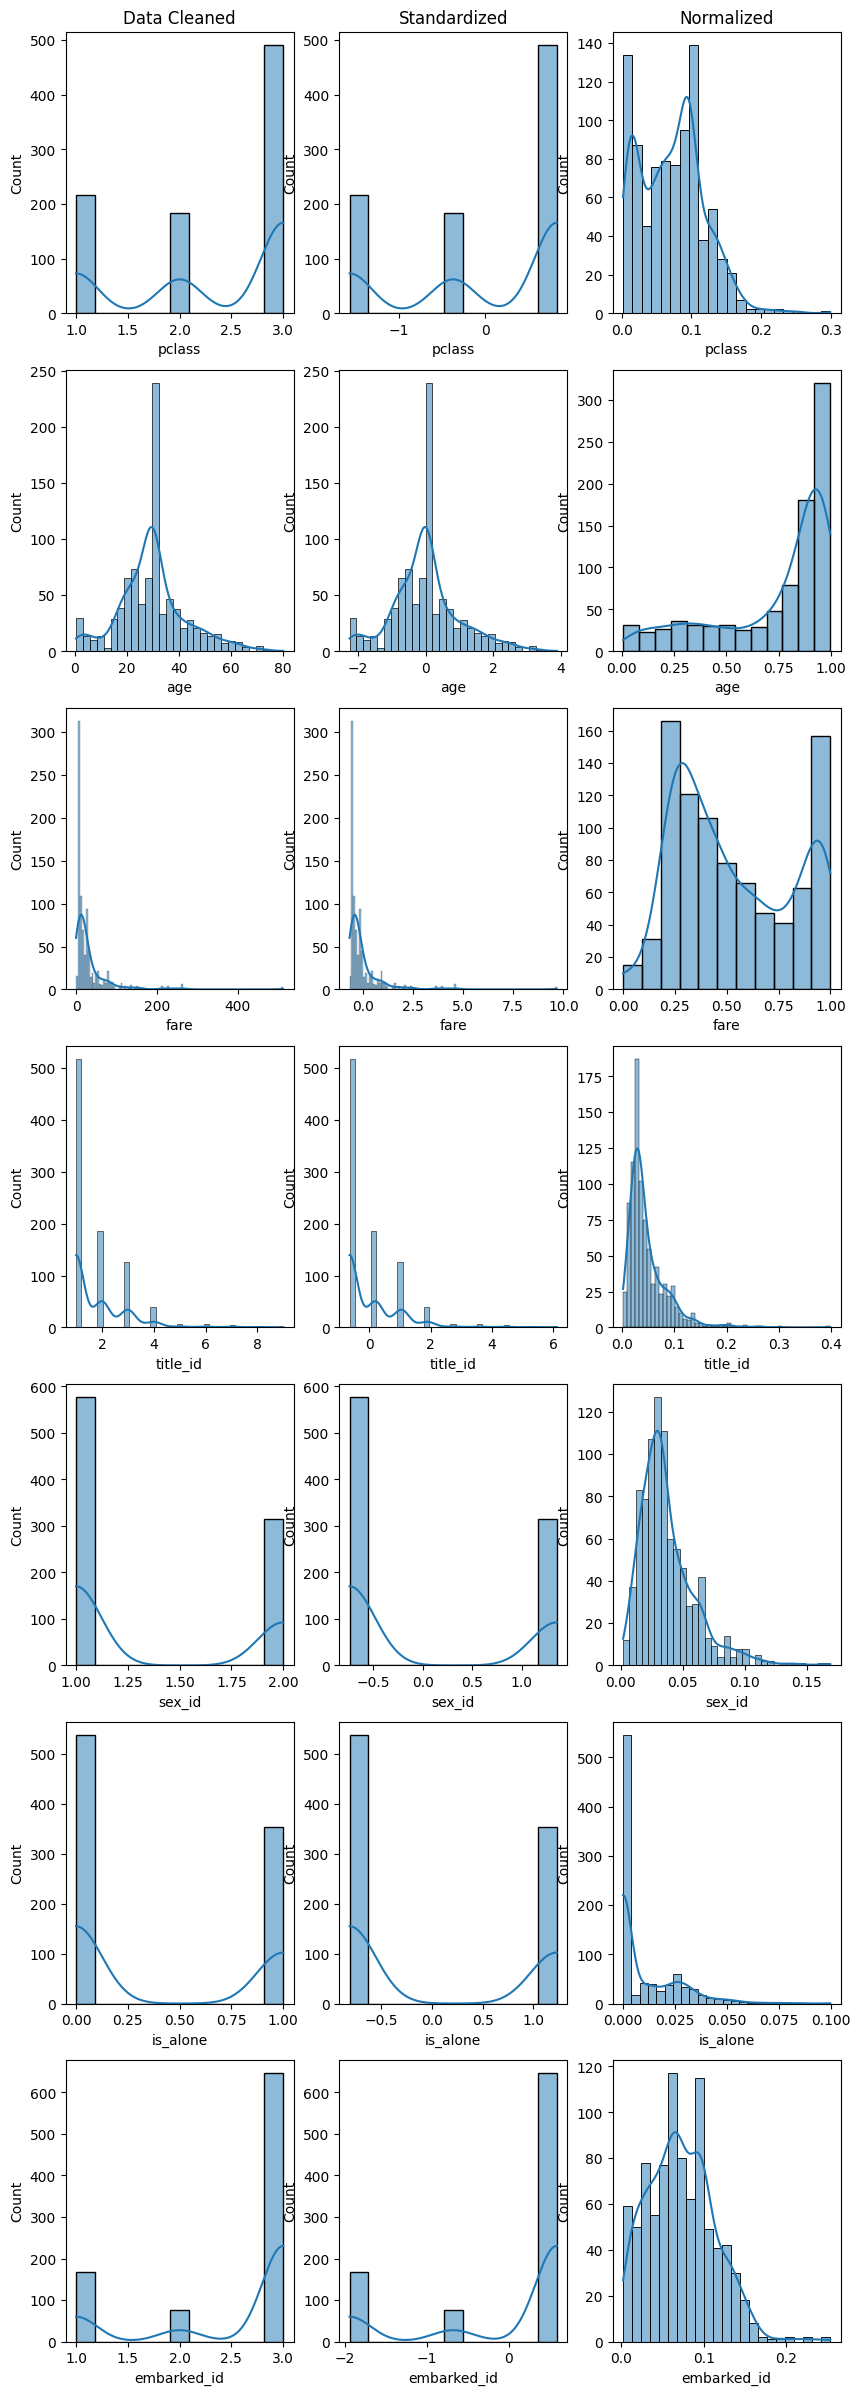

In [77]:
# Gráfico para comparar las variables limpias, las variables estandarizadas y las variables normalizadas

f, axes = plt.subplots(7, 3, figsize=(10, 30))

sns.histplot(data_cleaned["pclass"], kde=True, ax=axes[0, 0]).set(title='Data Cleaned')
sns.histplot(standardscaler_df["pclass"], kde=True, ax=axes[0, 1]).set(title='Standardized')
sns.histplot(normalized_df["pclass"], kde=True, ax=axes[0, 2]).set(title='Normalized')

sns.histplot(data_cleaned["age"], kde=True, ax=axes[1, 0])
sns.histplot(standardscaler_df["age"], kde=True, ax=axes[1, 1])
sns.histplot(normalized_df["age"], kde=True, ax=axes[1, 2])

sns.histplot(data_cleaned["fare"], kde=True, ax=axes[2, 0])
sns.histplot(standardscaler_df["fare"], kde=True, ax=axes[2, 1])
sns.histplot(normalized_df["fare"], kde=True, ax=axes[2, 2])

sns.histplot(data_cleaned["title_id"], kde=True, ax=axes[3, 0])
sns.histplot(standardscaler_df["title_id"], kde=True, ax=axes[3, 1])
sns.histplot(normalized_df["title_id"], kde=True, ax=axes[3, 2])

sns.histplot(data_cleaned["sex_id"], kde=True, ax=axes[4, 0])
sns.histplot(standardscaler_df["sex_id"], kde=True, ax=axes[4, 1])
sns.histplot(normalized_df["sex_id"], kde=True, ax=axes[4, 2])

sns.histplot(data_cleaned["is_alone"], kde=True, ax=axes[5, 0])
sns.histplot(standardscaler_df["is_alone"], kde=True, ax=axes[5, 1])
sns.histplot(normalized_df["is_alone"], kde=True, ax=axes[5, 2])

sns.histplot(data_cleaned["embarked_id"], kde=True, ax=axes[6, 0])
sns.histplot(standardscaler_df["embarked_id"], kde=True, ax=axes[6, 1])
sns.histplot(normalized_df["embarked_id"], kde=True, ax=axes[6, 2])


Acá si podemos apreciar que la normalización entrega resultados con una función más Gaussiana.

### Yeo-Johnson
Finalmente, utilizaremos "Yeo-Johnson" para quitar el sesgo a partir de las variables que ya fueron normalizadas.

In [79]:
# Sesgo
data_cleaned.skew()

pclass        -0.631
age            0.434
fare           4.787
title_id       2.282
sex_id         0.619
is_alone       0.420
embarked_id   -1.265
survived       0.479
dtype: float64

In [78]:
# Se aplica Yeo-Johnson a las variables con mayor sesgo
features_dc = data_cleaned[['fare','title_id']]

# Crear el PowerTransformer con el método "Yeo-Johnson"
pt = PowerTransformer(method = 'yeo-johnson', standardize = True)
skl_boxcox = pt.fit(features_dc)

# Se obtienen los Lambdas
calc_lambdas_bc = skl_boxcox.lambdas_

skl_boxcox = pt.transform(features_dc)

data_cleaned_yj = pd.DataFrame(data = skl_boxcox, columns = ['fare','title_id'])

data_cleaned_yj.head()

,fare,title_id
0,-0.879,-0.830
1,1.337,1.360
2,-0.790,0.829
3,1.067,1.360
4,-0.774,-0.830


In [80]:
data_cleaned_copy = data_cleaned.copy()
data_cleaned_copy.head()

,pclass,age,fare,title_id,sex_id,is_alone,embarked_id,survived
0,3,22.0,7.250,1,1,1,3,0
1,1,38.0,71.283,3,2,1,1,1
2,3,26.0,7.925,2,2,0,3,1
3,1,35.0,53.100,3,2,1,3,1
4,3,35.0,8.050,1,1,0,3,0


In [81]:
# Quitar las columnas transformadas desde el dataframe original
data_cleaned_copy.drop(['fare'], axis = 1, inplace = True)
data_cleaned_copy.drop(['title_id'], axis = 1, inplace = True)

# Unificar ambos dataframes
yj_df = pd.concat([data_cleaned_copy, data_cleaned_yj], axis = 1)
cols = yj_df.columns.tolist()
yj_df.head()

,pclass,age,sex_id,is_alone,embarked_id,survived,fare,title_id
0,3,22.0,1,1,3,0,-0.879,-0.830
1,1,38.0,2,1,1,1,1.337,1.360
2,3,26.0,2,0,3,1,-0.790,0.829
3,1,35.0,2,1,3,1,1.067,1.360
4,3,35.0,1,0,3,0,-0.774,-0.830


In [82]:
# Mover la variable a predecir (survived) al final.
columna_a_mover = yj_df.pop('survived')

# Insertar la columna al final del DataFrame
yj_df.insert(len(yj_df.columns), 'survived', columna_a_mover)
yj_df.head()

,pclass,age,sex_id,is_alone,embarked_id,fare,title_id,survived
0,3,22.0,1,1,3,-0.879,-0.830,0
1,1,38.0,2,1,1,1.337,1.360,1
2,3,26.0,2,0,3,-0.790,0.829,1
3,1,35.0,2,1,3,1.067,1.360,1
4,3,35.0,1,0,3,-0.774,-0.830,0


In [83]:
# Definir los nombres de las columnas
columns_names = yj_df.columns.tolist()

# Transformar el nuevo DF en un array
array = yj_df.values
X_yj = array[:,0:7]

print(columns_names[0:7])
print(X_yj[0:5, :])

['pclass', 'age', 'sex_id', 'is_alone', 'embarked_id', 'fare', 'title_id']
[[ 3.         22.          1.          1.          3.         -0.87882001
  -0.8304235 ]
 [ 1.         38.          2.          1.          1.          1.33665056
   1.35983213]
 [ 3.         26.          2.          0.          3.         -0.79006485
   0.82908776]
 [ 1.         35.          2.          1.          3.          1.06735243
   1.35983213]
 [ 3.         35.          1.          0.          3.         -0.77443897
  -0.8304235 ]]


<Axes: xlabel='embarked_id', ylabel='Count'>

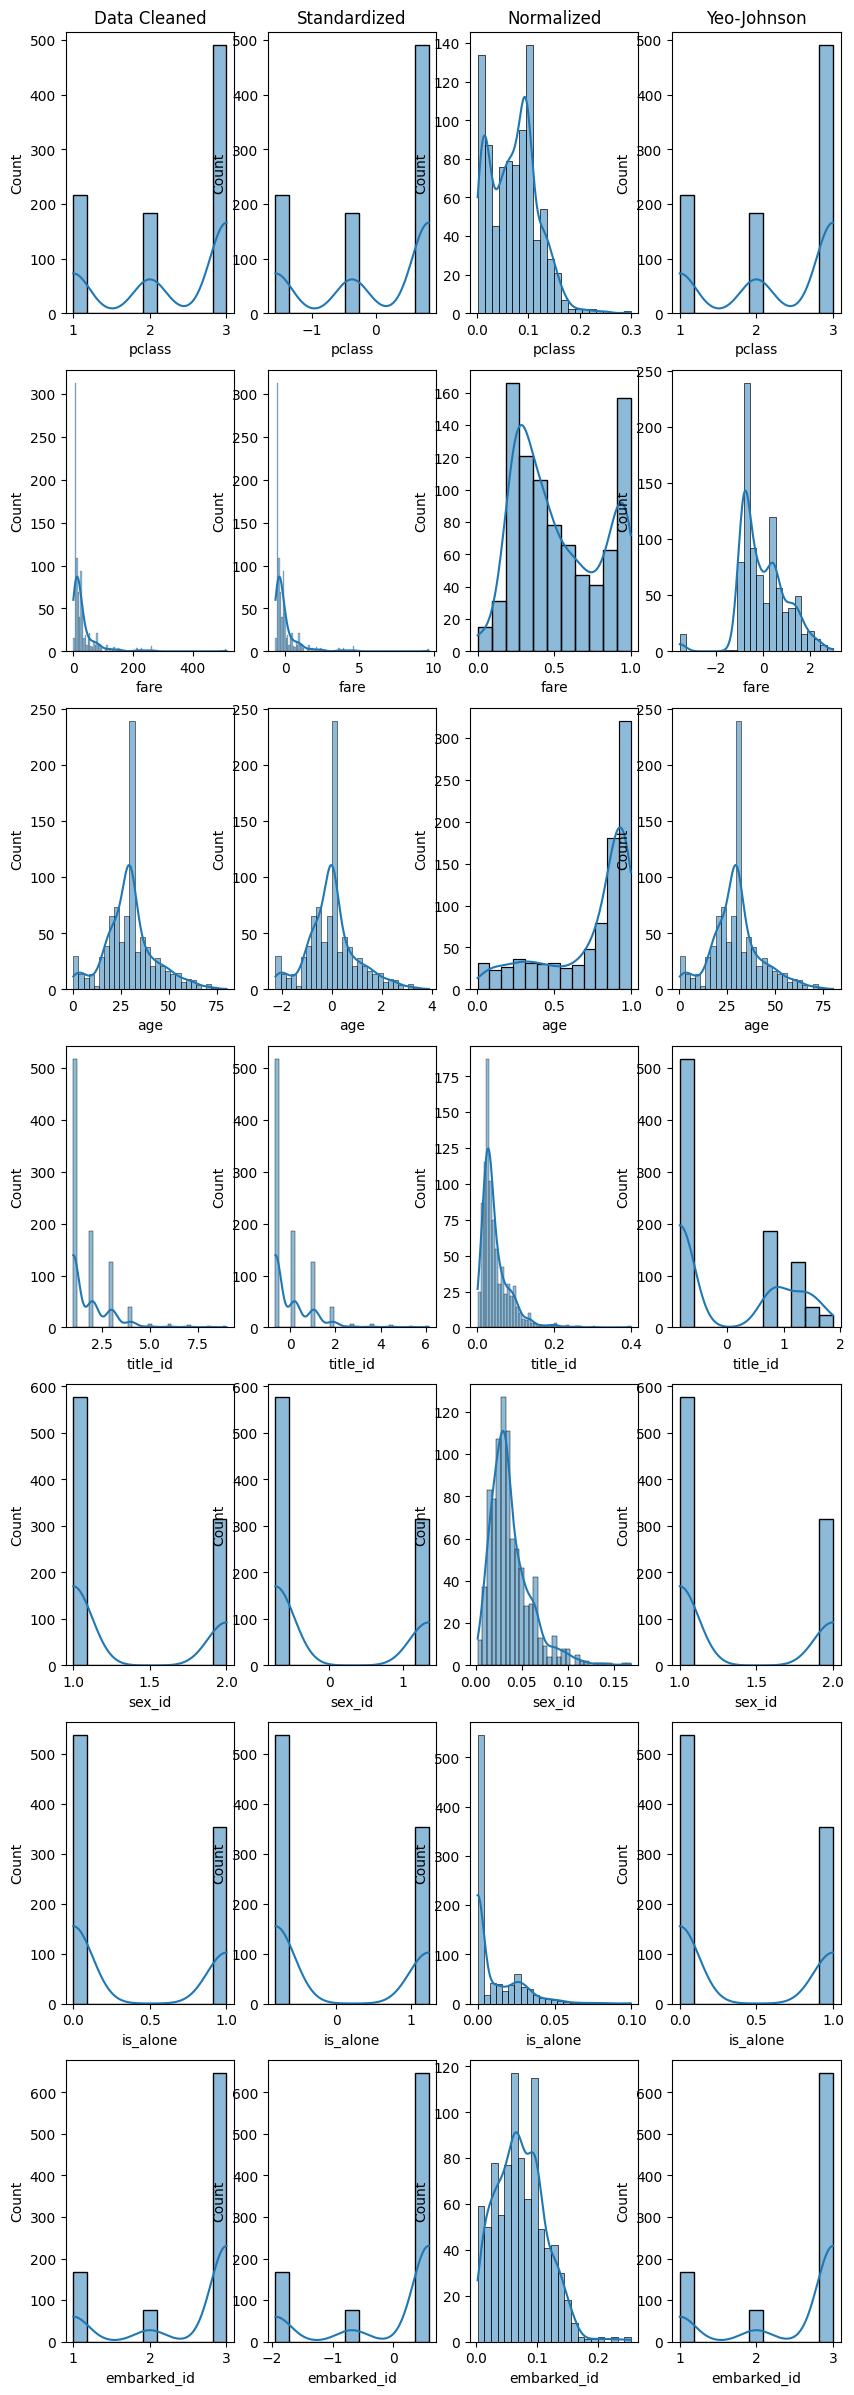

In [84]:
# Gráfico para comparar las variables limpias, las variables estandarizadas, las variables normalizadas y las variables transformadas por el método "Yeo-Johnson"

f, axes = plt.subplots(7, 4, figsize=(10, 30))

sns.histplot(data_cleaned["pclass"], kde=True, ax=axes[0, 0]).set(title='Data Cleaned')
sns.histplot(standardscaler_df["pclass"], kde=True, ax=axes[0, 1]).set(title='Standardized')
sns.histplot(normalized_df["pclass"], kde=True, ax=axes[0, 2]).set(title='Normalized')
sns.histplot(yj_df["pclass"], kde=True, ax=axes[0, 3]).set(title='Yeo-Johnson')

sns.histplot(data_cleaned["fare"], kde=True, ax=axes[1, 0])
sns.histplot(standardscaler_df["fare"], kde=True, ax=axes[1, 1])
sns.histplot(normalized_df["fare"], kde=True, ax=axes[1, 2])
sns.histplot(yj_df["fare"], kde=True, ax=axes[1, 3])

sns.histplot(data_cleaned["age"], kde=True, ax=axes[2, 0])
sns.histplot(standardscaler_df["age"], kde=True, ax=axes[2, 1])
sns.histplot(normalized_df["age"], kde=True, ax=axes[2, 2])
sns.histplot(yj_df["age"], kde=True, ax=axes[2, 3])

sns.histplot(data_cleaned["title_id"], kde=True, ax=axes[3, 0])
sns.histplot(standardscaler_df["title_id"], kde=True, ax=axes[3, 1])
sns.histplot(normalized_df["title_id"], kde=True, ax=axes[3, 2])
sns.histplot(yj_df["title_id"], kde=True, ax=axes[3, 3])

sns.histplot(data_cleaned["sex_id"], kde=True, ax=axes[4, 0])
sns.histplot(standardscaler_df["sex_id"], kde=True, ax=axes[4, 1])
sns.histplot(normalized_df["sex_id"], kde=True, ax=axes[4, 2])
sns.histplot(yj_df["sex_id"], kde=True, ax=axes[4, 3])

sns.histplot(data_cleaned["is_alone"], kde=True, ax=axes[5, 0])
sns.histplot(standardscaler_df["is_alone"], kde=True, ax=axes[5, 1])
sns.histplot(normalized_df["is_alone"], kde=True, ax=axes[5, 2])
sns.histplot(yj_df["is_alone"], kde=True, ax=axes[5, 3])

sns.histplot(data_cleaned["embarked_id"], kde=True, ax=axes[6, 0])
sns.histplot(standardscaler_df["embarked_id"], kde=True, ax=axes[6, 1])
sns.histplot(normalized_df["embarked_id"], kde=True, ax=axes[6, 2])
sns.histplot(yj_df["embarked_id"], kde=True, ax=axes[6, 3])

Acá si se aprecia una mejora en el sesgo de las variables a las cuales se aplicó Yeo-Johnson.

Por tanto, aplicamos el mismo procedimiento al test.

### Yeo-Johnson al data_test

In [85]:
features_test = data_test[['fare','title_id']]

# Crear el PowerTransformer con el método "Yeo-Johnson"
pt = PowerTransformer(method = 'yeo-johnson', standardize = True)
skl_boxcox = pt.fit(features_test)

# Obtener los Lambdas
calc_lambdas_bc = skl_boxcox.lambdas_

skl_boxcox = pt.transform(features_test)

data_test_yj = pd.DataFrame(data = skl_boxcox, columns = ['fare','title_id'])

data_test_yj.head()

,fare,title_id
0,-0.903,-0.878
1,-1.043,1.337
2,-0.644,0.760
3,-0.779,1.337
4,-0.365,-0.878


In [86]:
data_test_copy = data_test.copy()
data_test_copy.head()

,passengerid,pclass,age,fare,title_id,sex_id,is_alone,embarked_id
0,892,3,34.5,7.829,1,1,0,2
1,893,3,47.0,7.000,3,2,1,3
2,894,2,62.0,9.688,2,1,0,2
3,895,3,27.0,8.662,3,1,0,3
4,896,3,22.0,12.287,1,2,1,3


In [87]:
# Quitar las columnas transformadas desde el dataframe original
data_test_copy.drop(['fare'], axis = 1, inplace = True)
data_test_copy.drop(['title_id'], axis = 1, inplace = True)

# Unificar ambos dataframes
yj_test = pd.concat([data_test_copy, data_test_yj], axis = 1)
cols = yj_test.columns.tolist()
yj_test.head()

,passengerid,pclass,age,sex_id,is_alone,embarked_id,fare,title_id
0,892,3,34.5,1,0,2,-0.903,-0.878
1,893,3,47.0,2,1,3,-1.043,1.337
2,894,2,62.0,1,0,2,-0.644,0.760
3,895,3,27.0,1,0,3,-0.779,1.337
4,896,3,22.0,2,1,3,-0.365,-0.878


In [88]:
# Definir los nombres de las columnas
columns_names_test = yj_test.columns.tolist()

# Transformar el nuevo DF en un array
array = yj_test.values
X_test = array[:,1:8]

print(columns_names_test[1:8])
print(X_test[0:5, :])

['pclass', 'age', 'sex_id', 'is_alone', 'embarked_id', 'fare', 'title_id']
[[ 3.         34.5         1.          0.          2.         -0.90304889
  -0.87816938]
 [ 3.         47.          2.          1.          3.         -1.04254157
   1.33698377]
 [ 2.         62.          1.          0.          2.         -0.64370663
   0.75968242]
 [ 3.         27.          1.          0.          3.         -0.77884967
   1.33698377]
 [ 3.         22.          2.          1.          3.         -0.36466299
  -0.87816938]]


## Módelos de predicción

Luego de algunas pruebas con algoritmos, se verificó que funcionan mejor con los datos sin sesgo luego de haber aplicado "Yeo-Johnson".

### Algoritmos iniciales

In [89]:
models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis ()))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
scoring =  'accuracy'

for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_yj, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

LoR: 80.70% (4.56%)
LDA: 79.01% (4.79%)
k-NN: 77.78% (4.14%)
CART: 79.46% (3.24%)
NB: 77.67% (4.03%)
SVM: 79.57% (3.71%)


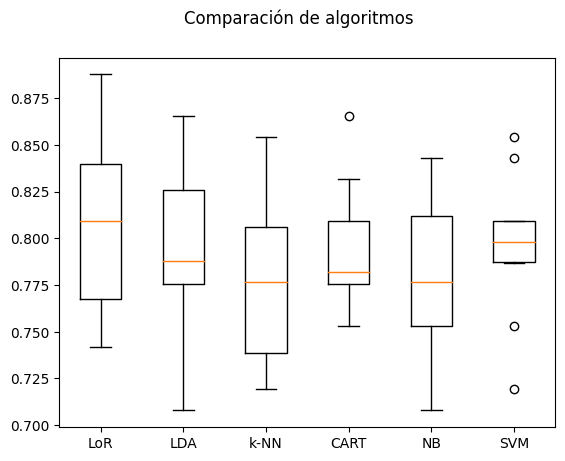

In [91]:
# Gráfico boxplot con los algoritmos iniciales
fig = plt.figure()
fig.suptitle("Comparación de algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Descartamos a NB (77.67), LoR (80.70%) y LDA (79.01%) que no superan los algoritmos de conjunto y no tienen muchos parámetros a modificar.

El resto de algoritmos los revisaremos en detalle en la etapa de Tuning ya que tienen un porcentaje cercano entre sí.

### Algoritmos de conjunto

In [92]:
cart = DecisionTreeClassifier()
num_trees = 100
seed = 7
max_features = 3

# Modelos
models2 = []
models2.append(('BC', BaggingClassifier(estimator=cart, n_estimators = num_trees, random_state=seed)))
models2.append(('RF', RandomForestClassifier(n_estimators = num_trees, max_features=max_features, random_state=seed)))
models2.append(('ET', ExtraTreesClassifier(n_estimators = num_trees, max_features=max_features, random_state=seed)))
models2.append(('GBC', GradientBoostingClassifier(n_estimators = num_trees, random_state=seed)))
models2.append(('AB', AdaBoostClassifier(n_estimators = num_trees, random_state=seed)))

results2 = []
names2 = []
scoring2 =  'accuracy'

for name2, model2 in models2:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results2 = cross_val_score(model2, X_yj, Y_train, cv=kfold, scoring=scoring2)
  results2.append(cv_results2)
  names2.append(name2)
  print(f"{name2}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

BC: 82.27% (5.25%)
RF: 81.93% (5.82%)
ET: 80.14% (6.11%)
GBC: 82.49% (3.96%)
AB: 81.60% (4.43%)


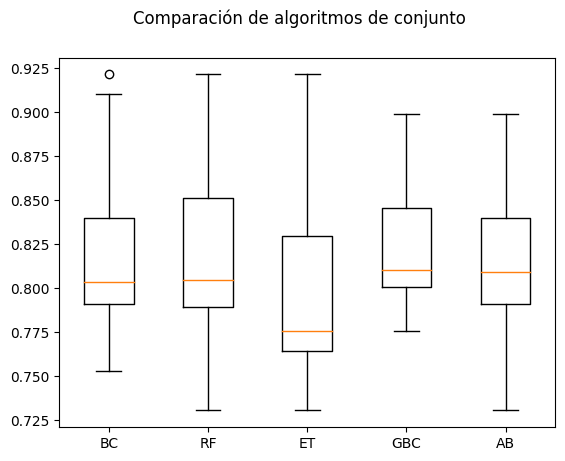

In [93]:
# Gráfico boxplot con los algoritmos de conjunto
fig = plt.figure()
fig.suptitle("Comparación de algoritmos de conjunto")
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

En los algoritmos de conjunto tienen todos porcentajes muy cercanos entre el 80 y 82%. Por tanto, se revisarán sus parámetros en la etapa de Tuning.

### Tuning

In [98]:
# Función para formatear resultado del promedio
def format_mean(result):
  format_result = "{:.2f}%".format(round(result.mean()*100.0,2))
  return format_result

# Función para formatear resultado de desviación estándar
def format_std(result):
  format_result = "{:.2f}%".format(round(result.std()*100.0,2))
  return format_result

In [97]:
# k-NN
model_knn = KNeighborsClassifier(n_neighbors=6, algorithm='brute')

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_knn = cross_val_score(model_knn, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_knn = format_mean(result_knn)
std_knn = format_std(result_knn)

print(f"k-NN: {accu_knn} {std_knn}")

k-NN: 78.56% 4.99%


In [100]:
# CART
model_dt = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=3, max_leaf_nodes=6)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_cart = cross_val_score(model_dt, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_cart = format_mean(result_cart)
std_cart = format_std(result_cart)

print(f"CART: {accu_cart} {std_cart}")

CART: 82.61% 5.72%


In [101]:
# SVM
model_svc = SVC(gamma='auto', C=0.6)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_svm = cross_val_score(model_svc, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_svm = format_mean(result_svm)
std_svm = format_std(result_svm)

print(f"SVM: {accu_svm} {std_svm}")

SVM: 79.13% 4.51%


In [102]:
# BC
model_bc = BaggingClassifier(n_estimators = 10, random_state=6, max_features=0.4)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_bc = cross_val_score(model_bc, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_bc = format_mean(result_bc)
std_bc = format_std(result_bc)

print(f"BC: {accu_bc} {std_bc}")

BC: 82.15% 4.34%


In [103]:
# RF
model_rf = RandomForestClassifier(n_estimators = 30, random_state=8, max_depth=5, min_samples_split=3)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_rf = cross_val_score(model_rf, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_rf = format_mean(result_rf)
std_rf = format_std(result_rf)

print(f"RF: {accu_rf} {std_rf}")

RF: 81.60% 4.99%


In [104]:
# ET
model_et = ExtraTreesClassifier(n_estimators = 80, random_state=8, max_depth=6)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_et = cross_val_score(model_et, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_et = format_mean(result_et)
std_et = format_std(result_et)

print(f"ET: {accu_et} {std_et}")

ET: 82.16% 4.08%


In [105]:
# GBC
model_gbc = GradientBoostingClassifier(n_estimators = 30, random_state=5, min_samples_split=0.1)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_gbc = cross_val_score(model_gbc, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_gbc = format_mean(result_gbc)
std_gbc = format_std(result_gbc)

print(f"GBC: {accu_gbc} {std_gbc}")

GBC: 82.27% 5.78%


In [106]:
# AB
model_ab = AdaBoostClassifier(n_estimators = 60)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
result_ab = cross_val_score(model_ab, X_yj, Y_train, cv=kfold, scoring='accuracy')

accu_ab = format_mean(result_ab)
std_ab = format_std(result_ab)

print(f"AB: {accu_ab} {std_ab}")

AB: 81.71% 4.51%


In [107]:
models = pd.DataFrame({
    'Model': ['KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC','Bagging Classifier', 'Random ForestClassifier', 'Extra Trees Classifier',
              'Gradient Boosting Classifier', 'AdaBoost Classifier'],
    'Score': [accu_knn, accu_cart, accu_svm, accu_bc, accu_rf, accu_et, accu_gbc, accu_ab],
    'Std': [std_knn, std_cart, std_svm, std_bc, std_rf, std_et,std_gbc, std_ab]})

models.sort_values(by='Score', ascending=False)

,Model,Score,Std
0,KNeighborsClassifier,82.61%,5.72%
1,DecisionTreeClassifier,82.61%,5.72%
6,Gradient Boosting Classifier,82.27%,5.78%
5,Extra Trees Classifier,82.16%,4.08%
3,Bagging Classifier,82.15%,4.34%
7,AdaBoost Classifier,81.71%,4.51%
4,Random ForestClassifier,81.60%,4.99%
2,SVC,79.13%,4.51%


Los algoritmos con mejor son resultado son k-NN, CART y GBC. Por tanto, se utilizarán estos 3 algoritmos para "Voting".

In [113]:
# Voting for Classification

clf1 = KNeighborsClassifier(n_neighbors=6, algorithm='brute')
clf2 = DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=3, max_leaf_nodes=6)
clf3 = GradientBoostingClassifier(n_estimators = 30, random_state=5, min_samples_split=0.1)

eclf1 = VotingClassifier(estimators=[('kNN', clf1), ('CART', clf2), ('GBC', clf3)])

eclf1 = eclf1.fit(X_yj, Y_train)

np.array_equal(eclf1.named_estimators_.kNN.predict(X_yj), eclf1.named_estimators_['kNN'].predict(X_yj))

eclf1 = eclf1.fit(X_yj, Y_train)
results = cross_val_score(eclf1, X_yj, Y_train, cv=kfold)
print(f"Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)")

Accuracy: 82.27% (5.40%)


### Resultado

In [114]:
# Entrenar el modelo a utilizar
model_knn = model_knn.fit(X_yj, Y_train)

In [115]:
# Quitar del test la columna "passengerid"
X_test  = data_test.drop("passengerid", axis=1).copy()
X_test.head()

,pclass,age,fare,title_id,sex_id,is_alone,embarked_id
0,3,34.5,7.829,1,1,0,2
1,3,47.0,7.000,3,2,1,3
2,2,62.0,9.688,2,1,0,2
3,3,27.0,8.662,3,1,0,3
4,3,22.0,12.287,1,2,1,3


In [117]:
# Aplicar el modelo al conjunto de datos de prueba para hacer predicciones
Y_pred = model_knn.predict(X_test.values)

# Crear nuevo DF, según lo solicita Kaggle con el id del pasajero y si sobrevivió o no
submission = pd.DataFrame({
        "PassengerId": yj_test["passengerid"],
        "Survived": Y_pred
    })

In [118]:
# Agregar las predicciones como una nueva columna "Survived" en el DataFrame de test.csv
submission.head()

,PassengerId,Survived
0,892,1.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,1.0


In [119]:
print(submission.dtypes)

PassengerId      int64
Survived       float64
dtype: object


In [120]:
submission['Survived'] = submission['Survived'].astype(int)

# Verificar el tipo de datos después de la conversión
print(submission.dtypes)

PassengerId    int64
Survived       int64
dtype: object


In [121]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,1


In [122]:
#Finalmente, generamos el .csv, el cual se subirá a la página web de Kaggle para verificar el porcentaje de acierto.
submission.to_csv('/content/drive/MyDrive/Estudios/Colab Notebooks/Pruebas/Titanic/submission.csv', index=False)